# Predicting Airline Passenger Satisfaction Using Machine Learning: A Data-Driven Approach to Enhancing Customer Experience

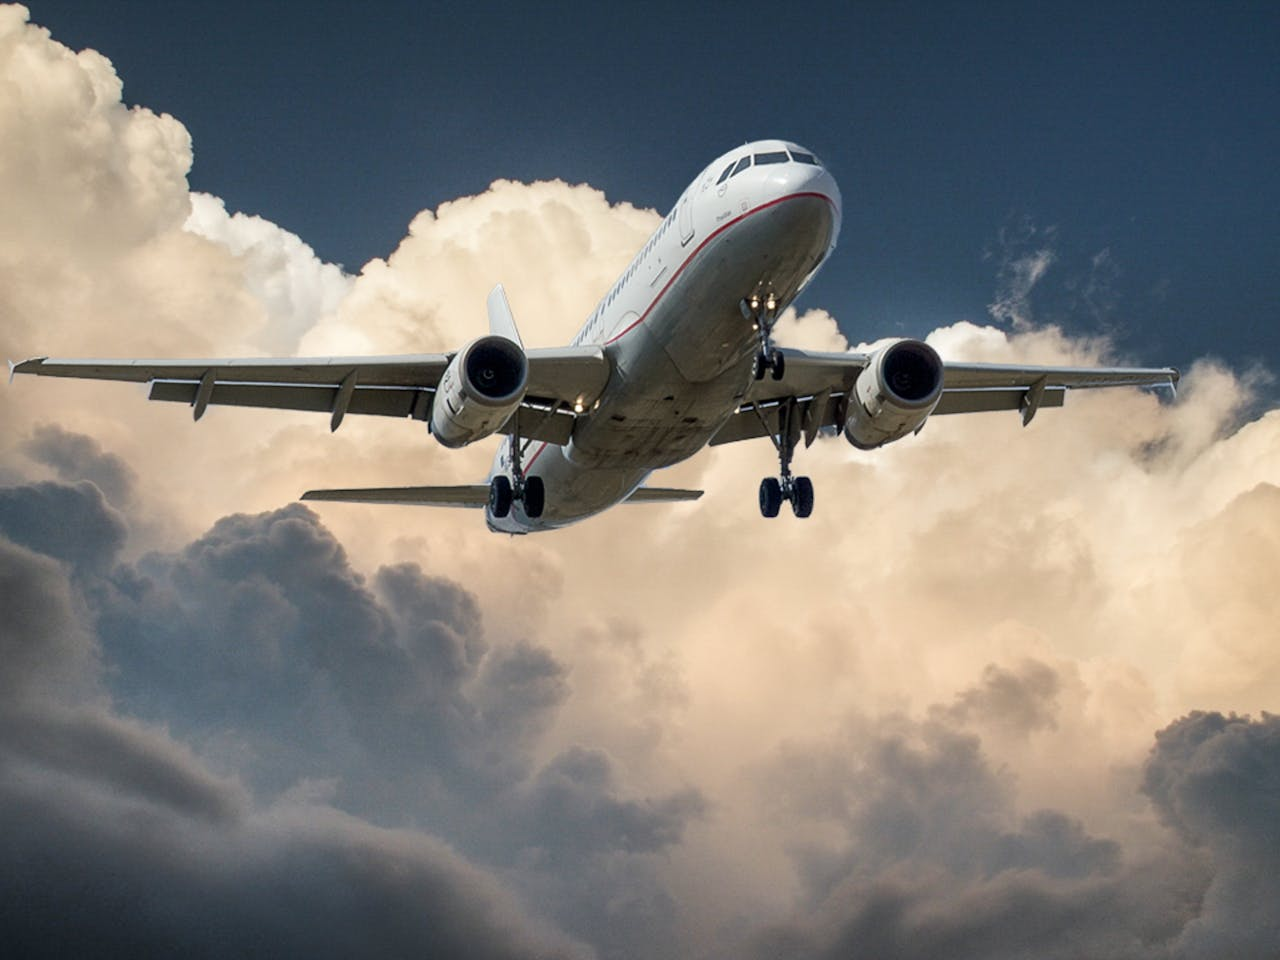

## Problem Statement
In the competitive airline industry, understanding customer satisfaction is essential for improving service quality and retaining loyal passengers. This project aims to develop a machine learning model that predicts whether a customer is "Satisfied" or "Neutral/Unhappy" based on various factors including demographic details, travel characteristics, and service-related ratings such as booking ease, inflight service, cleanliness, entertainment, and more. By identifying the key drivers of satisfaction, airlines can take proactive steps to enhance passenger experiences, optimize operations, and make informed, data-driven decisions to improve overall customer engagement.

Business Goal:
* Improve overall customer experience by identifying pain points.
* Predict customer satisfaction to proactively address service gaps.
* Segment customers based on their likelihood of satisfaction for targeted service improvements.


### Importing the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import normaltest, shapiro, boxcox
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

### Importing the data

In [2]:
# Reading the data csv file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/Airline Passenger Satisfaction/drive-download-20250501T125727Z-1-001.zip (Unzipped Files)/Data.csv")
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
#Setting the display max columns to none so that all the columns in the dataset are visible.
pd.set_option('display.max_columns', None)

### EDA and Data Cleaning

In [4]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [5]:
df.shape

(129880, 24)

There are 24 features and 1,29,880 rows.

"Satisfaction is the dependent variable here which has values "Satisfied" and "Neutral or Dissatisfied"

Its a classification problem. Predict if the customer is 'Satisfied' with the services or the customer is 'Neutral or Dissatisfied'.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

* Arrival Delay feature has some missing values.
* Most of the features have numerical data

In [7]:
df.describe()

,ID,Age,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


* ID: This feature is just a serial number, starting from 1. There no pattern for the ML model to learn from this. It might not be of much use for the model, so it can be dropped.
* Age: Age of the passengers: minimum age is 7 and maximum age is 85. Lookng at the Q1, Q2 and Q3 values, the data in the Age column looks like its mostly evenly distributed. And also it might not be having any outliers. Will explore further.
* Departure Delay: Flight delay in minumtes. Minimum delay is 0 minutes and maximum delay is 1592 minutes, which is approximately 26 hours. This could be an outlier, will explore more.
* Arrival Delay: Flight arrival delay in minutes. Minimum is 0 minutes and maximum is 1584 minumtes, which is approximately 26 hours. This also could be an outlier, will have to explore more to find out.
* Rest of the features have ordinal-categorical data. The values are ranging from 0 to 5; 0 : 'Not Applicable', 1: lowest and 5: highest level of satisfaction.

In [8]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Satisfaction
count,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6848,2
top,Female,Returning,Business,Business,337,Neutral or Dissatisfied
freq,65899,106100,89693,62160,840,73452


* Gender: IT shows that more number of female passengers have taken the survey compared to men.
* Customer Type: Is it a first time flyer or a returning passenger. Most of the participants are returning passengers.
* Type of Travel: Is it personal visit or Business travel. Most of the pasengers are Business travelers
* Class: Travel class of the seat in the flight, most of the passengers are travelling in BUsiness class seats.
* Flight Distance: Distance of the flight in miles. This should be a numeric data type, can change it to int or float. Most frequent flight distance is 337 miles.
* Satisfaction: The dependent variable. 'Neutral or Dissatified' is the most frequent value.

In [9]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


#### Making copy of the data for backup before making changes.

In [10]:
original_data = df.copy()

In [11]:
original_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


#### Converting the 'Flight Distance' to integer datatype
The Flight Distance feature has values that are not numeric, Finding those values and removing the non numeric characters from them.

In [12]:
# Check for values which are numeric or not and list the rows with non numeric values
df['is_numeric'] = df['Flight Distance'].str.isdecimal()
df[df['is_numeric'] == False]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,is_numeric
54,55,Male,36,Returning,Business,Business,3655$,40,71.0,1,1,4,3,1,3,3,3,2,1,3,1,3,1,Neutral or Dissatisfied,False
147,148,Female,54,Returning,Business,Business,22%7,58,62.0,3,3,3,3,3,2,3,2,3,2,2,2,2,2,Neutral or Dissatisfied,False
157,158,Male,22,First-time,Business,Economy,2$27,0,0.0,4,1,3,1,3,3,2,2,2,2,4,1,2,3,Neutral or Dissatisfied,False


In [13]:
# Regex function to remove special characters from given dataframe column
import re

def remove_special_characters(df, column):
    """Removes special characters from a specified column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        column (str): The name of the column to clean.

    Returns:
        pd.DataFrame: The modified DataFrame.
    """
    df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
    return df


In [14]:
df = remove_special_characters(df, 'Flight Distance')

In [15]:
# Checking if the non numeric values have been successfully converted to numeric
df[df['is_numeric'] == False]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,is_numeric
54,55,Male,36,Returning,Business,Business,3655,40,71.0,1,1,4,3,1,3,3,3,2,1,3,1,3,1,Neutral or Dissatisfied,False
147,148,Female,54,Returning,Business,Business,227,58,62.0,3,3,3,3,3,2,3,2,3,2,2,2,2,2,Neutral or Dissatisfied,False
157,158,Male,22,First-time,Business,Economy,227,0,0.0,4,1,3,1,3,3,2,2,2,2,4,1,2,3,Neutral or Dissatisfied,False


In [16]:
# Checking to see if any values are non numeric values in the Flight Distance column
df['is_numeric'] = df['Flight Distance'].str.isdecimal()
df[df['is_numeric'] == False]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,is_numeric


In [17]:
# Dropping the is_numeric column as its not needed
df = df.drop('is_numeric', axis=1)

In [18]:
df.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,4,3,5,4,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,3,4,4,3,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,4,3,4,4,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,1,3,2,1,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied


In [19]:
# Converting Flight Distance to int datatype
df['Flight Distance'] = df['Flight Distance'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

#### Checking for null values

In [21]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


Arrival delay has null values.

In [22]:
# Checking the rows where Arrival Delay is null
arr_delay_null = df[df['Arrival Delay'].isnull()].sort_values(by='Departure Delay', ascending=False)
arr_delay_null

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
91872,91873,Male,46,Returning,Business,Business,2475,530,NaN,3,3,4,4,3,3,4,5,4,4,4,3,3,5,Satisfied
29973,29974,Male,50,Returning,Business,Business,95,455,NaN,3,3,3,1,3,3,3,4,3,4,2,1,4,4,Neutral or Dissatisfied
33366,33367,Male,48,Returning,Personal,Economy,2355,414,NaN,4,3,2,2,3,3,2,4,2,3,3,3,5,4,Neutral or Dissatisfied
91948,91949,Male,67,Returning,Personal,Economy,2446,332,NaN,4,3,5,5,5,4,5,4,5,3,5,3,3,4,Neutral or Dissatisfied
38175,38176,Female,57,Returning,Personal,Economy,1091,271,NaN,1,4,3,3,2,1,3,3,3,4,1,4,2,2,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121191,121192,Female,7,Returning,Personal,Economy,2521,0,NaN,2,4,1,4,2,1,1,5,1,1,2,3,1,1,Neutral or Dissatisfied
129003,129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,3,1,3,3,2,1,4,1,1,3,3,1,4,Neutral or Dissatisfied
129014,129015,Male,57,Returning,Business,Business,2704,0,NaN,4,4,3,4,4,4,4,4,5,2,4,4,4,4,Satisfied
883,884,Male,39,Returning,Business,Business,396,0,NaN,3,5,5,4,3,3,4,3,3,3,3,3,3,3,Satisfied


In [23]:
# Checking to see the rows where depearture delay is larger than 60 minutes for arrival delay as null
arr_delay_null[arr_delay_null['Departure Delay'] >= 60]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
91872,91873,Male,46,Returning,Business,Business,2475,530,NaN,3,3,4,4,3,3,4,5,4,4,4,3,3,5,Satisfied
29973,29974,Male,50,Returning,Business,Business,95,455,NaN,3,3,3,1,3,3,3,4,3,4,2,1,4,4,Neutral or Dissatisfied
33366,33367,Male,48,Returning,Personal,Economy,2355,414,NaN,4,3,2,2,3,3,2,4,2,3,3,3,5,4,Neutral or Dissatisfied
91948,91949,Male,67,Returning,Personal,Economy,2446,332,NaN,4,3,5,5,5,4,5,4,5,3,5,3,3,4,Neutral or Dissatisfied
38175,38176,Female,57,Returning,Personal,Economy,1091,271,NaN,1,4,3,3,2,1,3,3,3,4,1,4,2,2,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124156,124157,Female,42,Returning,Business,Business,2133,63,NaN,5,5,3,4,5,3,5,3,5,5,3,5,3,3,Satisfied
16370,16371,Female,29,First-time,Business,Economy,1215,62,NaN,3,3,5,3,4,5,2,4,2,2,5,3,2,5,Neutral or Dissatisfied
29980,29981,Female,55,Returning,Business,Economy,234,61,NaN,4,4,1,2,4,3,1,3,5,5,3,3,3,3,Satisfied
19505,19506,Male,30,Returning,Business,Business,2801,60,NaN,4,4,1,4,4,3,5,1,5,5,2,4,5,4,Satisfied


For the rows where Arrival Delay is null, there are 88 rows where the Departure delay is more than 60 minutes.

Generally if a flight departure is delayed then the arrival is also delayed. To impute the null values here, we can use the corresponding departure delay values.

In [24]:
# Imputing the null values in Arrival Delay using the values from Departure Delay
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Departure Delay'])

In [25]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


#### Dropping the ID column

In [26]:
df = df.drop('ID', axis=1)

In [27]:
df.head(10)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
5,Male,43,Returning,Business,Business,3788,0,0.0,4,4,3,5,4,4,4,4,3,3,4,4,4,4,Satisfied
6,Male,43,Returning,Business,Business,1963,0,0.0,3,3,4,4,3,5,5,5,4,5,5,3,5,5,Satisfied
7,Female,60,Returning,Business,Business,853,0,3.0,3,4,3,4,4,3,4,4,4,4,3,4,3,3,Satisfied
8,Male,50,Returning,Business,Business,2607,0,0.0,1,1,3,2,1,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,Female,38,Returning,Business,Business,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied


#### Defining functions



In [28]:
#Function to check for outliers
def check_outliers(df, col):
  """
  This function checks for outliers in the given column of the given dataframe.
  It calculates the IQR and Q1,Q3 to get the lower limit value and upper limit value.
  It returns the lower limit and upper limit values.

  Parameters:
  -----------
  df : pandas.DataFrame
      The input DataFrame containing the data.
  col : str
      The name of the column to check for outliers.

  Returns:
  --------
  LL : float
      The lower limit value.
  UL : float
      The upper limit value.

  Example:
  --------
  ll, ul = check_outliers(df, 'Age')
  """

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  LL = Q1 - 1.5 * IQR
  UL = Q3 + 1.5 * IQR

  print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

  outlier_count_ul = df[df[col] > UL].shape[0]
  outlier_perc_ul = (outlier_count_ul * 100) / df.shape[0]

  outlier_count_ll = df[df[col] < LL].shape[0]
  outlier_perc_ll = (outlier_count_ll * 100) / df.shape[0]

  print(f"# of Outliers on the Higher Side: {outlier_count_ul} | % of Outliers on the Higher Side: {outlier_perc_ul}%")
  print(f"# of Outliers on the Lower Side: {outlier_count_ll} | % of Outliers on the Lower Side: {outlier_perc_ll}%")

  return LL, UL

In [29]:
# Function to check the data distribution
def col_distribution(df, col_name):
  """
  This function plots a distplot and a box plot for the given column of the given dataframe.
  It also calculates the skewness and kurtosis of the data.
  It also uses the check_outliers function to check for outliers.

  Parameters:
  -----------
  df : pandas.DataFrame
      The input DataFrame containing the data.
  col_name : str
      The name of the column.

  Returns:
  --------
  LL : float
      The lower limit value.
  UL : float
      The upper limit value.

  Example:
  --------
  ll, ul = col_distribution(df, 'Age')

  """
  print("********** Data Distribution *********")
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  sns.distplot(df[col_name])

  plt.subplot(1,2,2)
  sns.boxplot(df[col_name])
  print("The skewness for the original data is {}.".format(df[col_name].skew()))
  print("The kurtosis for the original data is {}.".format(df[col_name].kurt()))

  print()
  print("********** Outlier Detection *********")
  ll, ul = check_outliers(df, col_name)
  print()
  return ll, ul

In [30]:
# Function for pie chart of categorical data
def pie_chart(df, col_name):
  """
  This function plots a pie chart for the given column of the given dataframe.
  It also calculates the percentage of each category.

  Parameters:
  -----------
  df : pandas.DataFrame
      The input DataFrame containing the data.
  col_name : str
      The name of the column.

  Returns:
  --------
  Does not return anything.

  Example:
  --------
  pie_chart(df, 'Age')

  """
  plt.figure(figsize=(15,4))
  plt.pie(df[col_name].value_counts(), labels=df[col_name].value_counts().index, autopct='%1.1f%%')
  plt.title(col_name)
  plt.show()

In [31]:
# Function for plotting feature with hue of Satisfaction
def ind_col_vs_dep_col(df, ind_col, dep_col):
  """
  This function plots a countplot for the given column of the given dataframe with a hue of other given column.
  It also calculates the percentage of each category.

  Parameters:
  -----------
  df : pandas.DataFrame
      The input DataFrame containing the data.
  ind_col : str
      The name of the column, independent feature.
  dep_col : str
      The name of the column, dependent feature.

  Returns:
  --------
  Does not return anything.

  Example:
  --------
  ind_col_vs_dep_col(df, 'Age', 'Satisfaction')

  """
  print(f"'{ind_col}' feature with respect to '{dep_col}'")
  print("-----------------------------")
  print(df[[ind_col,dep_col]].groupby([ind_col]).value_counts())
  print()
  ax = sns.countplot(x=ind_col, hue=dep_col, data=df)

  # Add value labels to each bar
  for p in ax.patches:
    height = int(p.get_height())

    if height>0:
        ax.text(p.get_x() + p.get_width() / 2, height + 0.1, height, ha="center")

  # Adjust layout and display the plot
  plt.tight_layout()
  plt.show()


In [32]:
def label_encode(df, col_name):
  """
  This function encodes the given column of the given dataframe using LabelEncoder.

  Parameters:
  -----------
  df : pandas.DataFrame
      The input DataFrame containing the data.
  col_name : str
      The name of the column.

  Returns:
  --------
  The dataframe after encoding the given column

  Example:
  --------
  label_encoder(df, 'Age')

  """
  le = preprocessing.LabelEncoder()
  df[col_name] = le.fit_transform(df[col_name])
  return df


In [33]:
def select_k_best(X, y, score_func, k, n_largest):
  """
  This function applies the SelectKBest feature selection method to the given data.

  Parameters:
  -----------
  X: pandas.DataFrame
      The input DataFrame containing the independent features.
  y: pandas.Series
      The target variable.
  score_func: function
      The scoring function to use for feature selection.
  k: int
      The number of features to select.
  n_largest: int
      The number of largest features to return.
  Returns:
  --------
  pandas.DataFrame
      The selected features.

  Example:
  --------
  select_k_best(x,y,chi2,10,10)

  """
  if X.isnull().sum().sum() != 0:
    print(f"Input dataframe cannot contain any NaN value, but it has {X.isnull().sum().sum()} NaN values.")
    return
  best_features = SelectKBest(score_func=score_func, k=k)
  fit = best_features.fit(X,y)

  df_scores = pd.DataFrame(fit.scores_)
  df_pvalues = pd.DataFrame(fit.pvalues_)
  df_columns = pd.DataFrame(X.columns)

  f_scores = pd.concat([df_columns, df_scores], axis=1)
  f_scores.columns = ['Features', 'Scores']
  f_scores = f_scores.sort_values(by='Scores', ascending=False)
  return f_scores.nlargest(n_largest, 'Scores')



In [34]:
def apply_pca(X, standardize=True, n_components=None):
    """
    Apply Principal Component Analysis (PCA) to the input data.

    This function standardizes the input data (optional) and performs PCA to reduce
    dimensionality. It returns the PCA object, a DataFrame with transformed data, and
    a DataFrame with loadings for each PCA component.

    Parameters:
    -----------
    X : pandas.DataFrame
        The input DataFrame containing the features to be analyzed.

    standardize : bool, optional (default=True)
        If True, standardize the input data by subtracting the mean and dividing by the
        standard deviation for each feature.

    n_components : int or None, optional (default=None)
        Number of components to keep. If None, all components are kept.

    Returns:
    --------
    pca : sklearn.decomposition.PCA
        The PCA object that contains information about the PCA transformation.

    X_pca : pandas.DataFrame
        Transformed data with principal components as columns.

    loadings : pandas.DataFrame
        Loadings matrix, indicating the contribution of each original feature to each
        principal component.

    Example:
    --------
    pca, X_pca, loadings = apply_pca(X, standardize=True, n_components=3)
    """
    if X.isnull().sum().sum() != 0:
        print(f"Input dataframe cannot contain any NaN value, but it has {X.isnull().sum().sum()} NaN values.")
        return
    X.replace(np.inf, np.nan, inplace=True)
    max_values = X.max()
    X.fillna(max_values, inplace=True)

    X.replace(-np.inf, np.nan, inplace=True)
    min_values = X.min()
    X.fillna(min_values, inplace=True)

    # Standardize
    if standardize:
        cols = X.columns
        X = StandardScaler().fit_transform(X)
        X = pd.DataFrame(X, columns=cols)

    # Create principal components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)

    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )

    return pca, X_pca, loadings



In [35]:
def plot_pca_variance(pca, width=10, dpi=120):
    """
    Plot Explained Variance and Cumulative Variance graphs for Principal Component Analysis (PCA).

    This function creates two subplots in a single figure. The first subplot displays the
    percentage of explained variance for each principal component, while the second subplot
    shows the cumulative explained variance as more components are added.

    Parameters:
    -----------
    pca : sklearn.decomposition.PCA
        The PCA object obtained from applying PCA to the data.

    width : int, optional (default=10)
        Width of the figure in inches.

    dpi : int, optional (default=120)
        Dots per inch for figure resolution.

    Returns:
    --------
    None

    Example:
    --------
    pca, X_pca, loadings = apply_pca(X, standardize=True, n_components=3)
    plot_pca_variance(pca)
    """

    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, round(10*max(evr)+0.5)/10)
    )
    axs[0].title.set_weight('bold')
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[0].set_xticks(grid)
    axs[0].set_xticklabels(grid)

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(grid, cv, "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.01)
    )
    axs[1].title.set_weight('bold')
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[1].set_xticks(grid)
    axs[1].set_xticklabels(grid)

    # Cumulative variance value on the 2nd plot
    axs[1].annotate(f'CV={cv[-1]:.3f}', (grid[-1], cv[-1]), textcoords="offset points", xytext=(-15,-10), ha='center')

    # Set up figure
    fig.set(figwidth=width, dpi=dpi)

In [36]:
def model_pipeline(X_train, y_train, X_test, y_test):
  """
  This function runs the given train and test data through a pipeline of models
  and prints the classification report for each model.

  Parameters:
  -----------
  X_train : pandas.DataFrame
      The input DataFrame containing the independent features for training.
  y_train : pandas.Series
      The target variable for training.

  X_test : pandas.DataFrame
      The input DataFrame containing the independent features for testing.
  y_test : pandas.Series
      The target variable for testing.

  Returns:
  --------
  Does not return anything.

  Example:
  --------
  model_pipeline(x_train, y_train, x_test, y_test)

  """
  models = {
    'LOGISTIC REGRESSION': LogisticRegression(random_state=42),
    'DECISION TREE': DecisionTreeClassifier(random_state=42),
    'RANDOM FOREST': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBOOST': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
  }
  for name, model in models.items():
    clf = Pipeline(steps=[
        ('classifier', model)
    ])
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print(f"\n{name} CLASSIFICATION REPORT:\n")
    print("*************** Train Data **************")
    print(classification_report(y_train, y_pred_train))
    print("")
    print("*************** Test Data ***************")
    print(classification_report(y_test, y_pred_test))
    print("")
    print("*************** Confusion Matrix ***************")
    print(confusion_matrix(y_test, y_pred_test))
    print("")
    print("----------------------------------------------------------------------")


#### Univariate Analysis and Outlier Detection

##### 1. **Gender**

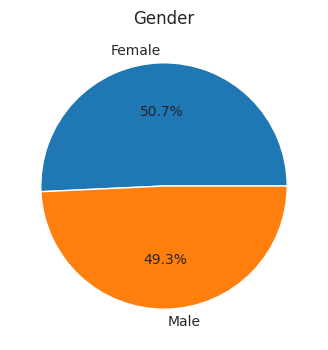

In [37]:
pie_chart(df,'Gender')

Almost equal number of male and female passengers have participated

'Gender' feature with respect to 'Satisfaction'
-----------------------------
Gender  Satisfaction           
Female  Neutral or Dissatisfied    37630
        Satisfied                  28269
Male    Neutral or Dissatisfied    35822
        Satisfied                  28159
Name: count, dtype: int64



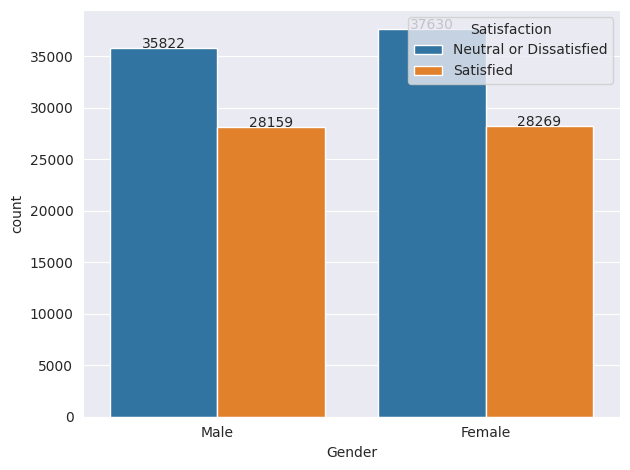

In [38]:
ind_col_vs_dep_col(df, 'Gender', 'Satisfaction')

##### 2. **Age**

In [39]:
df['Age'].describe()

,Age
count,129880.000000
mean,39.427957
std,15.119360
min,7.000000
25%,27.000000
50%,40.000000
75%,51.000000
max,85.000000


********** Data Distribution *********
The skewness for the original data is -0.0036062117453358896.
The kurtosis for the original data is -0.7191402271588134.

********** Outlier Detection *********
Q1: 27.0 | Q3: 51.0 | IQR: 24.0 | LL: -9.0 | UL: 87.0
# of Outliers on the Higher Side: 0 | % of Outliers on the Higher Side: 0.0%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%



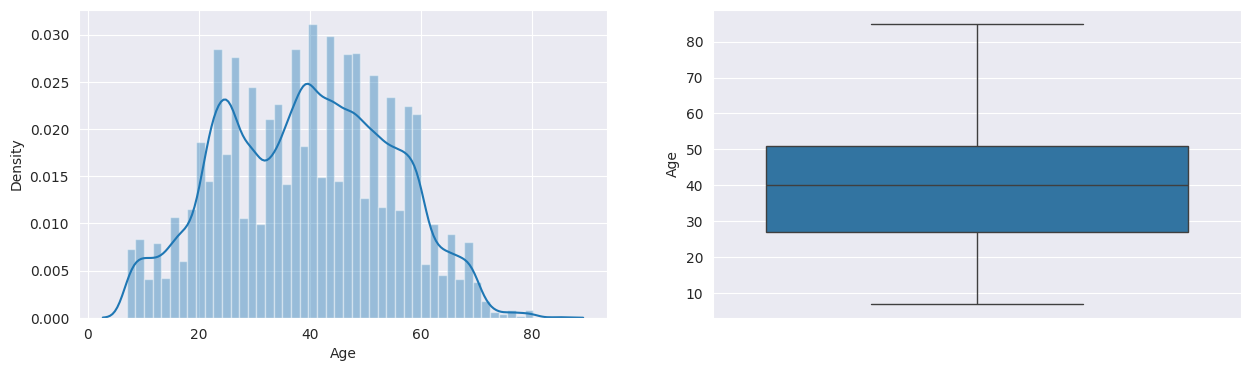

In [40]:
age_ll, age_ul = col_distribution(df,'Age')

There are no outliers in the data.

Skewness is -ve but very minimum.

Kurtosis shows that it is platykurtic as the peak is flatter compared to normal distribution, which indicates there no extreme values or outliers in the data.

##### 3. **Customer Type**

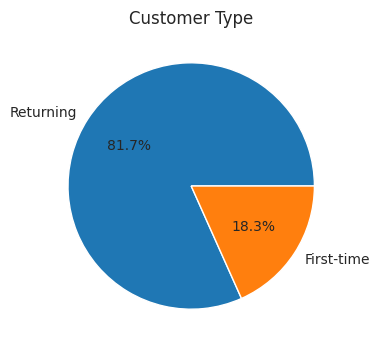

In [41]:
pie_chart(df,'Customer Type')

More than 81% of the passengers are returning customers.

'Customer Type' feature with respect to 'Satisfaction'
-----------------------------
Customer Type  Satisfaction           
First-time     Neutral or Dissatisfied    18080
               Satisfied                   5700
Returning      Neutral or Dissatisfied    55372
               Satisfied                  50728
Name: count, dtype: int64



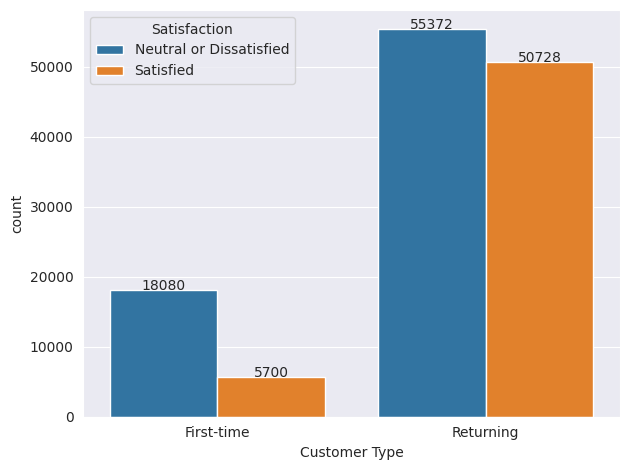

In [42]:
ind_col_vs_dep_col(df, 'Customer Type', 'Satisfaction')

For both Returning and First time passengers, more passengers are Neutral or Dissatisfied.

##### 4. **Type of Travel**

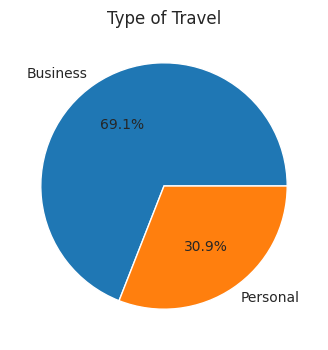

In [43]:
pie_chart(df,'Type of Travel')

More passengers are travelling on BUsiness trips than on Personal trips

'Type of Travel' feature with respect to 'Satisfaction'
-----------------------------
Type of Travel  Satisfaction           
Business        Satisfied                  52356
                Neutral or Dissatisfied    37337
Personal        Neutral or Dissatisfied    36115
                Satisfied                   4072
Name: count, dtype: int64



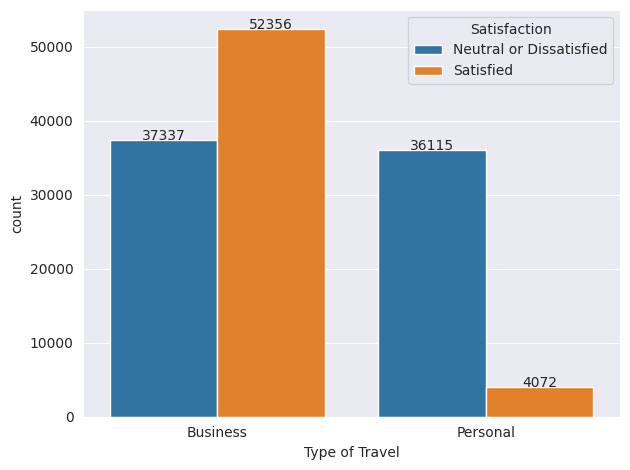

In [44]:
ind_col_vs_dep_col(df,'Type of Travel', 'Satisfaction')

Passengers travelling on Business trips are more satisfied than the passengers travelling on personal trips

##### 5. **Class**

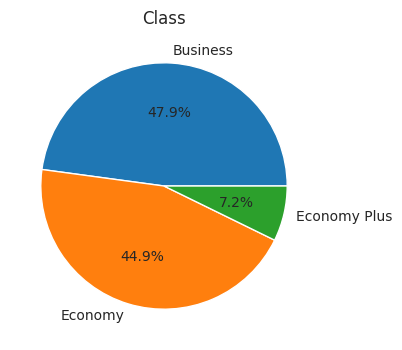

In [45]:
pie_chart(df,'Class')

'Class' feature with respect to 'Satisfaction'
-----------------------------
Class         Satisfaction           
Business      Satisfied                  43166
              Neutral or Dissatisfied    18994
Economy       Neutral or Dissatisfied    47366
              Satisfied                  10943
Economy Plus  Neutral or Dissatisfied     7092
              Satisfied                   2319
Name: count, dtype: int64



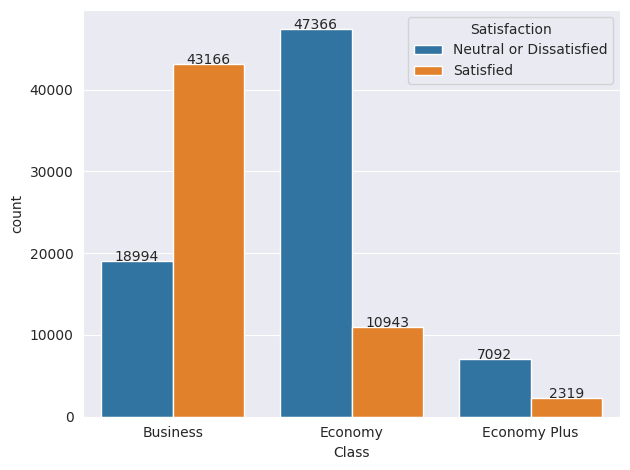

In [46]:
ind_col_vs_dep_col(df,'Class', 'Satisfaction')

Business class travellers are more statisfied, where as passengers travelling by Economy or Economy Plus are Dissatisfied. This can infer that the services provided by the airlines to the Business class is much superior compared to the Economy class passengers.

Checking to see which class seats are preferred by first time travellers and returning travellers.

'Customer Type' feature with respect to 'Class'
-----------------------------
Customer Type  Class       
First-time     Economy         13634
               Business         9231
               Economy Plus      915
Returning      Business        52929
               Economy         44675
               Economy Plus     8496
Name: count, dtype: int64



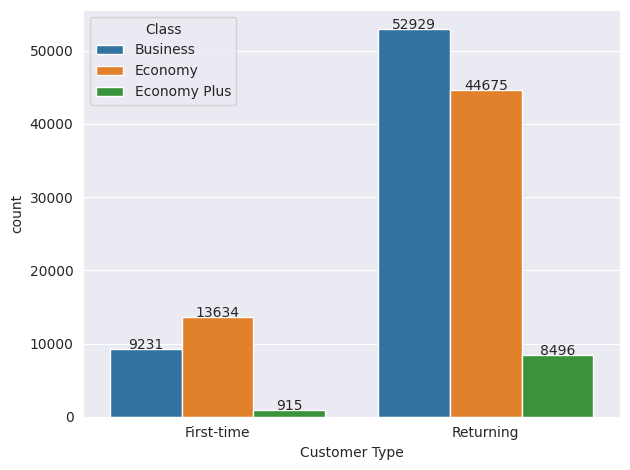

In [47]:
ind_col_vs_dep_col(df, 'Customer Type','Class')

First time travellers are mostly going for Economy class where as Returning passengers are preferring Business class more.

Analysing the type of travel with respect to class of the seat

'Type of Travel' feature with respect to 'Class'
-----------------------------
Type of Travel  Class       
Business        Business        59487
                Economy         25304
                Economy Plus     4902
Personal        Economy         33005
                Economy Plus     4509
                Business         2673
Name: count, dtype: int64



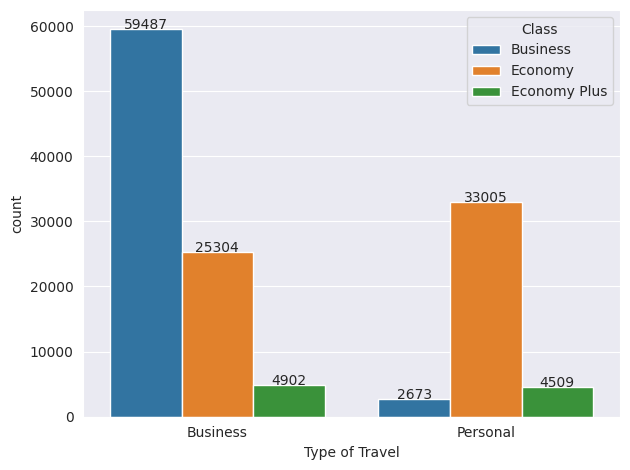

In [48]:
ind_col_vs_dep_col(df,'Type of Travel', 'Class')

Passengers travelling on business trips are mostly going for Business class seats where as passengers travelling on personal trips are prefering the Economy seats. Economy Plus seats, although low in count is same for business trip or personal trip

'Customer Type' feature with respect to 'Type of Travel'
-----------------------------
Customer Type  Type of Travel
First-time     Business          23579
               Personal            201
Returning      Business          66114
               Personal          39986
Name: count, dtype: int64



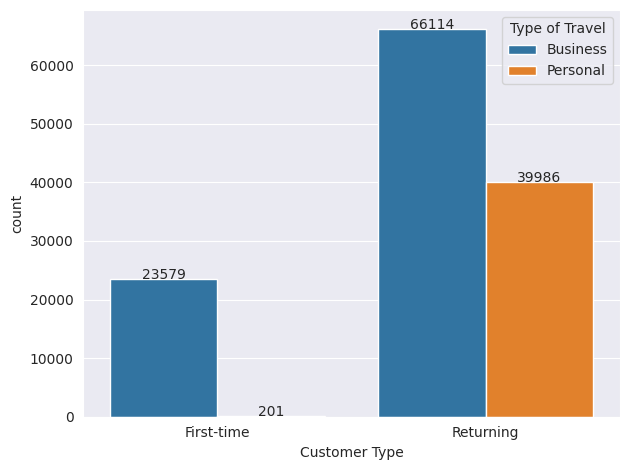

In [49]:
ind_col_vs_dep_col(df, 'Customer Type','Type of Travel')

Business related travellers are more for both first time and returning. This can infer that travellers are opting for air travel mostly for business trips and not so much for personal trips.

##### 6. **Flight Distance**

In [50]:
df['Flight Distance'].describe()

,Flight Distance
count,129880.000000
mean,1190.316392
std,997.452477
min,31.000000
25%,414.000000
50%,844.000000
75%,1744.000000
max,4983.000000


********** Data Distribution *********
The skewness for the original data is 1.108142305835399.
The kurtosis for the original data is 0.2655029049032227.

********** Outlier Detection *********
Q1: 414.0 | Q3: 1744.0 | IQR: 1330.0 | LL: -1581.0 | UL: 3739.0
# of Outliers on the Higher Side: 2855 | % of Outliers on the Higher Side: 2.198182938096705%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%



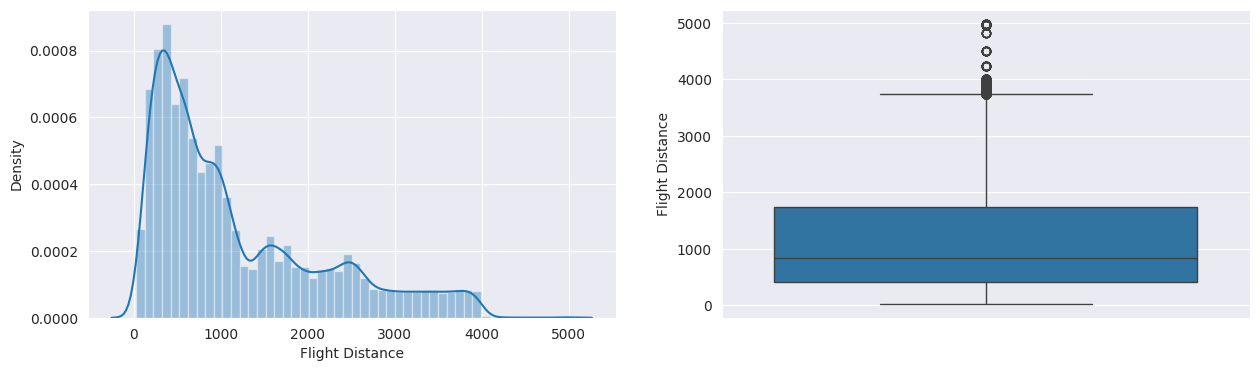

In [51]:
fdist_ll, fdist_ul = col_distribution(df, 'Flight Distance')

* Skewness > 1 which means the data is right skewed.
* Kurtosis is < 3 so its platykurtic; as the kurtosis is slightly greater than 0, its not normal distribution, it indicates there are some outliers.
* Outliers: lower side there are 0 but on the higher side 2.19% outliers are detected. These can be treated by capping method using the upper limit value (fdist_ul) that was returend by the function.

In [52]:
df['Flight Distance'] = np.where(df['Flight Distance'] >= fdist_ul, fdist_ul, df['Flight Distance'])

********** Data Distribution *********
The skewness for the original data is 1.0728851086745532.
The kurtosis for the original data is 0.11937323880023731.

********** Outlier Detection *********
Q1: 414.0 | Q3: 1744.0 | IQR: 1330.0 | LL: -1581.0 | UL: 3739.0
# of Outliers on the Higher Side: 0 | % of Outliers on the Higher Side: 0.0%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%



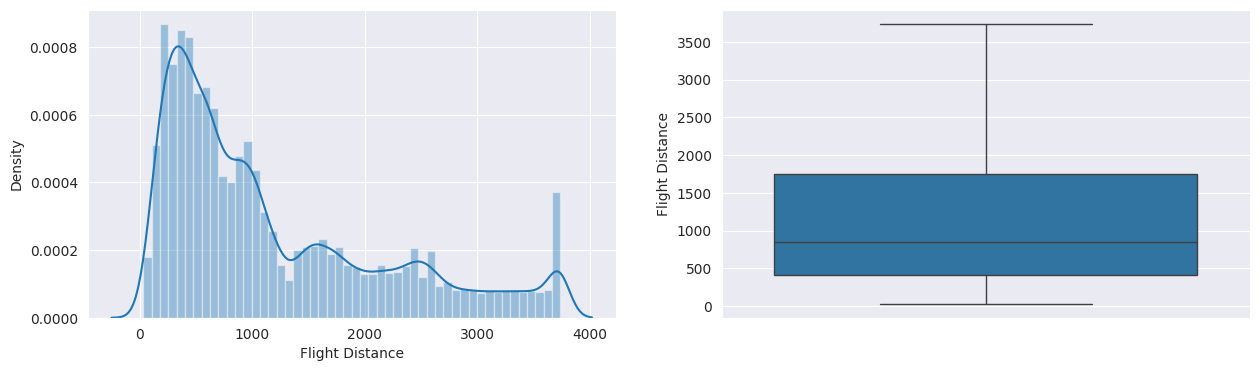

In [53]:
# Checking the distribution for outliers
fdist_ll, fdist_ul = col_distribution(df, 'Flight Distance')

The outliers are fixed now.

As the data is still right skewed, to fix we can try applying the transformation techniques such log, square root and boxcox.

In [54]:
def check_transformation(df,col_Name):
  log_trans = np.log(df[col_Name])
  sqrt_trans = np.sqrt(df[col_Name])
  boxcox_trans, _ = boxcox(df[col_Name])
  boxcox_skew = stats.skew(boxcox_trans)
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(log_trans).set(title = f'Log Transformation \n Skewness = {log_trans.skew():.3f}')
  plt.subplot(1,3,2)
  sns.distplot(sqrt_trans).set(title = f'Square Root Transformation \n Skewness = {sqrt_trans.skew():.3f}')
  plt.subplot(1,3,3)
  sns.distplot(boxcox_trans).set(title = f'Boxcox Transformation \n Skewness = {boxcox_skew:.3f}')

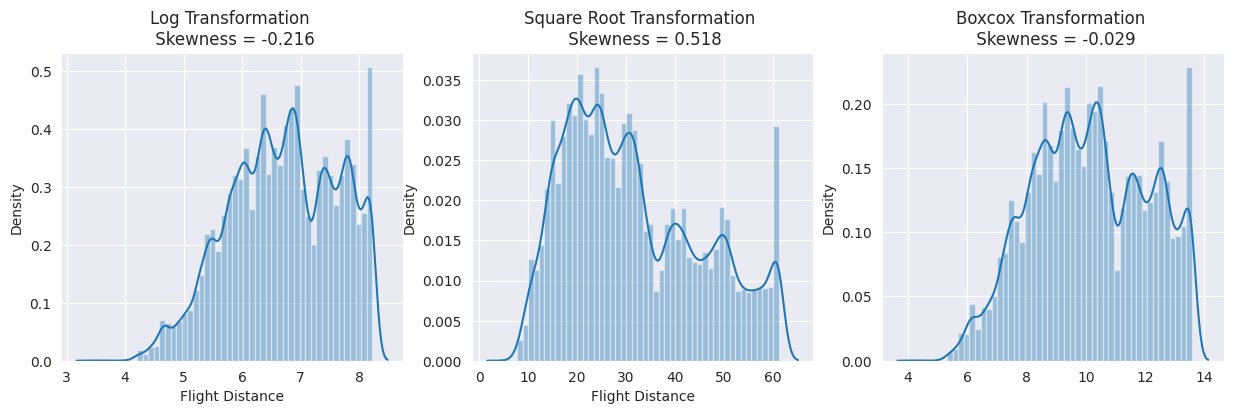

In [55]:
check_transformation(df,'Flight Distance')

Looking at these transformations, square root transformation looks like a better option as the other two are giving -ve skewness.

Applying square root transformation on the dataset.

In [56]:
df['Flight Distance'] = np.sqrt(df['Flight Distance'])

Final check on the Flight Distance feature for skewness and outliers

********** Data Distribution *********
The skewness for the original data is 0.5178717583300261.
The kurtosis for the original data is -0.7530554686713167.

********** Outlier Detection *********
Q1: 20.346989949375804 | Q3: 41.7612260356422 | IQR: 21.4142360862664 | LL: -11.774364180023795 | UL: 73.8825801650418
# of Outliers on the Higher Side: 0 | % of Outliers on the Higher Side: 0.0%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%



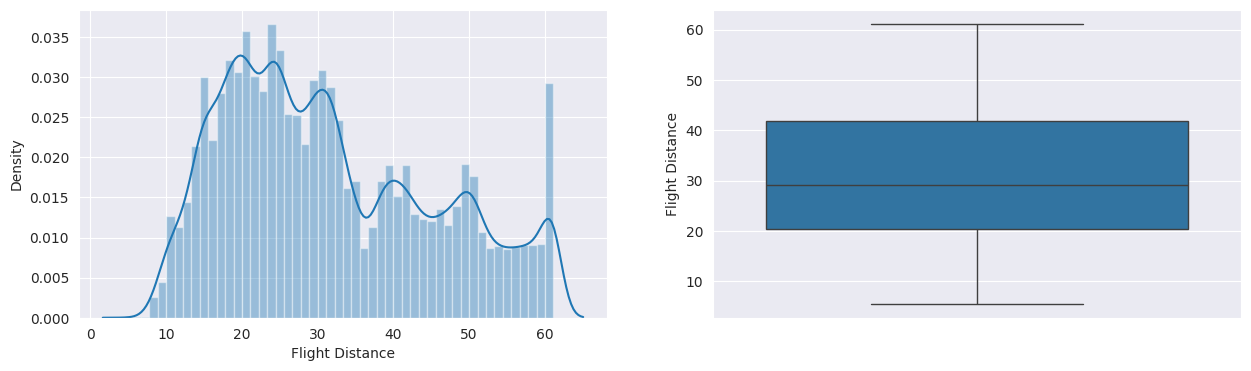

In [57]:
fdist_ll, fdist_ul = col_distribution(df, 'Flight Distance')

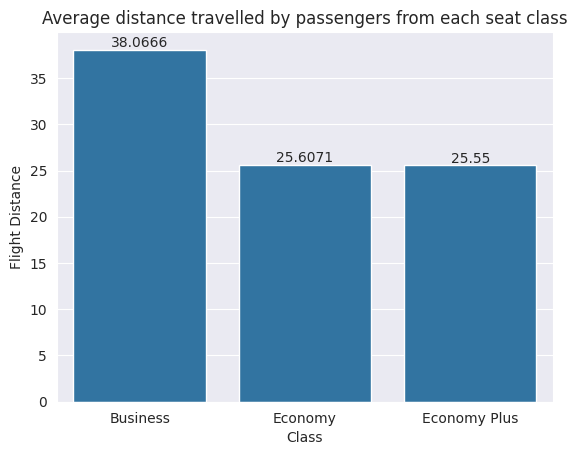

In [58]:
ax = sns.barplot(df, x="Class", y="Flight Distance", errorbar = None, estimator="mean")
ax.bar_label(ax.containers[0])
plt.title("Average distance travelled by passengers from each seat class")
plt.show()


Passengers travelling business class have travelled longer distance compared to economy and economy plus.

##### 7. **Departure Delay**

In [59]:
df['Departure Delay'].describe()

,Departure Delay
count,129880.000000
mean,14.713713
std,38.071126
min,0.000000
25%,0.000000
50%,0.000000
75%,12.000000
max,1592.000000


********** Data Distribution *********
The skewness for the original data is 6.821980310173463.
The kurtosis for the original data is 100.64454628325034.

********** Outlier Detection *********
Q1: 0.0 | Q3: 12.0 | IQR: 12.0 | LL: -18.0 | UL: 30.0
# of Outliers on the Higher Side: 18098 | % of Outliers on the Higher Side: 13.9344009855251%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%



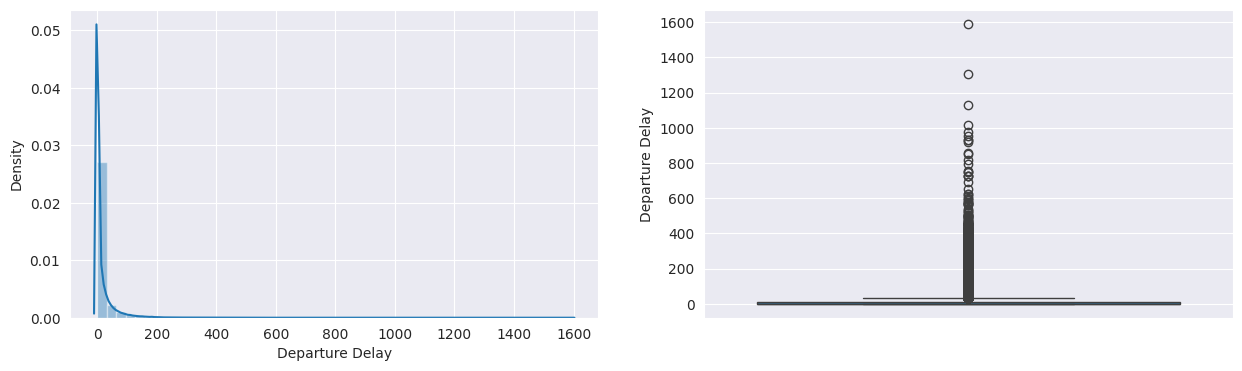

In [60]:
dd_ll, dd_ul = col_distribution(df, 'Departure Delay')

The Skewness and Kurtosis are very high and outlier percentage is also high. The data is given in minutes, converting the data into hours and checking again

In [61]:
# Converting the time to hours
df['Departure Delay'] = df['Departure Delay']/60

********** Data Distribution *********
The skewness for the original data is 6.821980310173463.
The kurtosis for the original data is 100.64454628325032.

********** Outlier Detection *********
Q1: 0.0 | Q3: 0.2 | IQR: 0.2 | LL: -0.30000000000000004 | UL: 0.5
# of Outliers on the Higher Side: 18098 | % of Outliers on the Higher Side: 13.9344009855251%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%



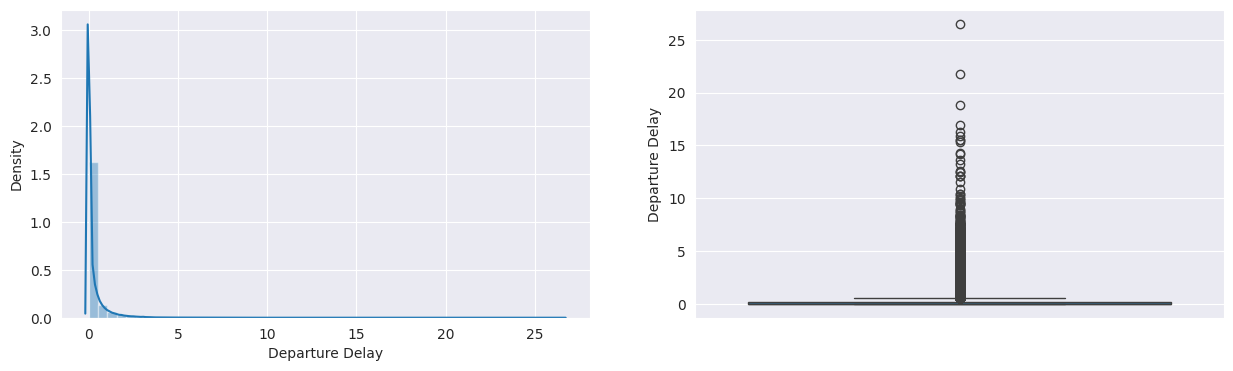

In [62]:
dd_ll, dd_ul = col_distribution(df, 'Departure Delay')

In [63]:
df['Departure Delay'].value_counts()

,count
Departure Delay,
0.000000,73356
0.016667,3682
0.033333,2855
0.050000,2535
0.066667,2309
...,...
15.350000,1
9.683333,1
5.750000,1


The skewness and kurtosis are very high, also the outliers are high.

In [64]:
yes_dept_delay = df[df['Departure Delay'] != 0]
no_dept_delay = df[df['Departure Delay'] == 0]
print(f"with out delay: {no_dept_delay.shape}")
print(f"With Delay : {yes_dept_delay.shape}")
print(f"No Departure delay percentage = {no_dept_delay.shape[0]/df.shape[0]*100}")
print(f"Departure Delay percentage = {yes_dept_delay.shape[0]/df.shape[0]*100}")

with out delay: (73356, 23)
With Delay : (56524, 23)
No Departure delay percentage = 56.47982753310748
Departure Delay percentage = 43.52017246689252


About 56% of the flights were on time, with out any departure delay. 43% of the flight had departure delay.

Analyzing the satisfaction of passengers when their flight departure was delayed

In [65]:
yes_dept_delay['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,33795
Satisfied,22729


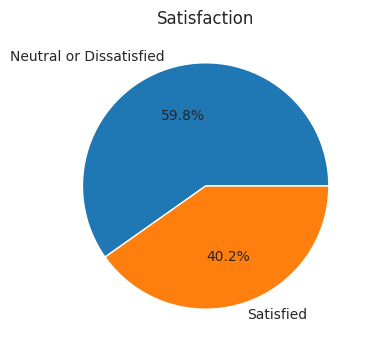

In [66]:
pie_chart(yes_dept_delay, 'Satisfaction')

Analyzing the satisfaction of passengers when their flight departure was not delayed

In [67]:
no_dept_delay['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,39657
Satisfied,33699


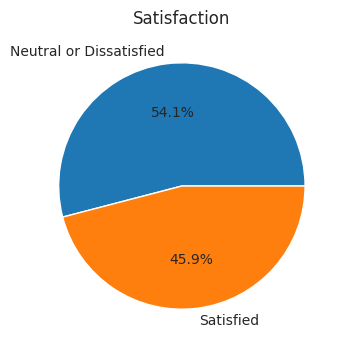

In [68]:
pie_chart(no_dept_delay, 'Satisfaction')

Analyzing the departure delay data further

In [69]:
yes_dept_delay['Departure Delay'].describe()

,Departure Delay
count,56524.000000
mean,0.563482
std,0.863595
min,0.016667
25%,0.100000
50%,0.266667
75%,0.666667
max,26.533333


Looking at the stats for flights with departure delay, upto 75th percentile of the data, the delay is less than 1 hour.

In [70]:
yes_dept_delay['binned_delay'] = pd.cut(yes_dept_delay['Departure Delay'], bins=20)
binned_delay = pd.DataFrame(yes_dept_delay['binned_delay'].value_counts())
binned_delay.reset_index(inplace=True)
binned_delay.columns = ['binned_delay', 'count']
binned_delay

,binned_delay,count
0,"(-0.00985, 1.342]",50408
1,"(1.342, 2.668]",4413
2,"(2.668, 3.994]",1106
3,"(3.994, 5.32]",354
4,"(5.32, 6.646]",138
5,"(6.646, 7.972]",55
6,"(7.972, 9.298]",16
7,"(9.298, 10.623]",13
8,"(11.949, 13.275]",7
9,"(14.601, 15.927]",4


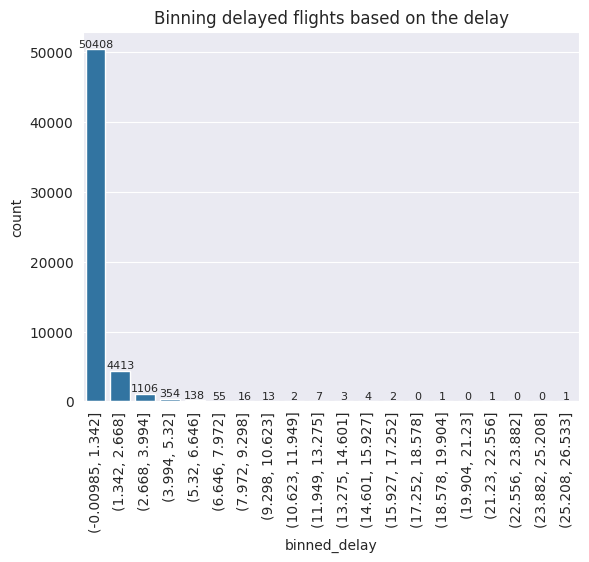

In [71]:
ax = sns.barplot(x='binned_delay', y='count', data=binned_delay)
label = ax.containers[0]
ax.bar_label(label, fontsize=8)
plt.xticks(rotation=90)
plt.title("Binning delayed flights based on the delay")
plt.show()

In [72]:
# Calculating the percentage of flights in the first bin
50408/56524*100

89.17981742268772

In [73]:
# calculating the percentage of flights in rest of the bins
(56524-50408)/56524*100

10.820182577312291

Analysing it further using the binning method, 48,206 which is about 89% of the flights have a delay close to 1 hour. Only 10% of the flights have a longer than 1 hour delay.  

As most of the data for Departure delay feature falls close to 0, we can convert this feature to binary values 0 or 1. Where, zero delay is represented by 0 and rest are represented by 1.

In [74]:
df['dept_delay_encoded'] = np.where(df['Departure Delay'] > 0, 1, 0)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,dept_delay_encoded
0,Male,48,First-time,Business,Business,28.653098,0.033333,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1
1,Female,35,Returning,Business,Business,28.653098,0.433333,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied,1
2,Male,41,Returning,Business,Business,29.206164,0.000000,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied,0
3,Male,50,Returning,Business,Business,43.646306,0.000000,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied,0
4,Female,49,Returning,Business,Business,58.906706,0.000000,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied,0


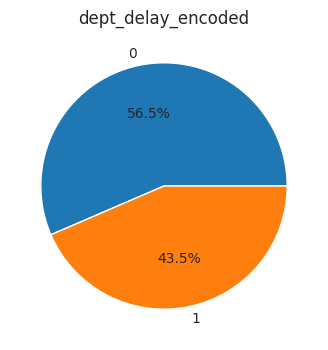

In [75]:
pie_chart(df,'dept_delay_encoded')

56.5% of the flights had no delay and 43.5% of the flight have experienced some delay

##### 8. **Arrival Delay**

In [76]:
df['Arrival Delay'].describe()

,Arrival Delay
count,129880.000000
mean,15.160102
std,38.599601
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,1584.000000


********** Data Distribution *********
The skewness for the original data is 6.641308759463372.
The kurtosis for the original data is 94.02464642226252.

********** Outlier Detection *********
Q1: 0.0 | Q3: 13.0 | IQR: 13.0 | LL: -19.5 | UL: 32.5
# of Outliers on the Higher Side: 17615 | % of Outliers on the Higher Side: 13.56251924853711%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%



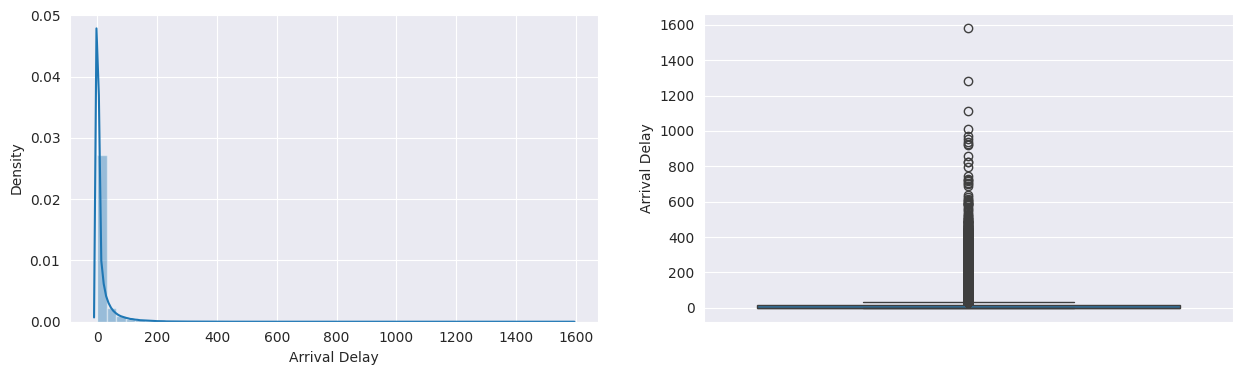

In [77]:
ad_ll, ad_ul = col_distribution(df, 'Arrival Delay')

Similar to departure delay, the Arrival delay feature also has a very high kurtosis and is heavily skewed to the right. The outliers are also on the higher side.

The data is in minutes, converting it to hours would make it easier to read and understand

In [78]:
# Converting the time to hours
df['Arrival Delay'] = df['Arrival Delay']/60

********** Data Distribution *********
The skewness for the original data is 6.641308759463371.
The kurtosis for the original data is 94.02464642226249.

********** Outlier Detection *********
Q1: 0.0 | Q3: 0.21666666666666667 | IQR: 0.21666666666666667 | LL: -0.325 | UL: 0.5416666666666667
# of Outliers on the Higher Side: 17615 | % of Outliers on the Higher Side: 13.56251924853711%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%



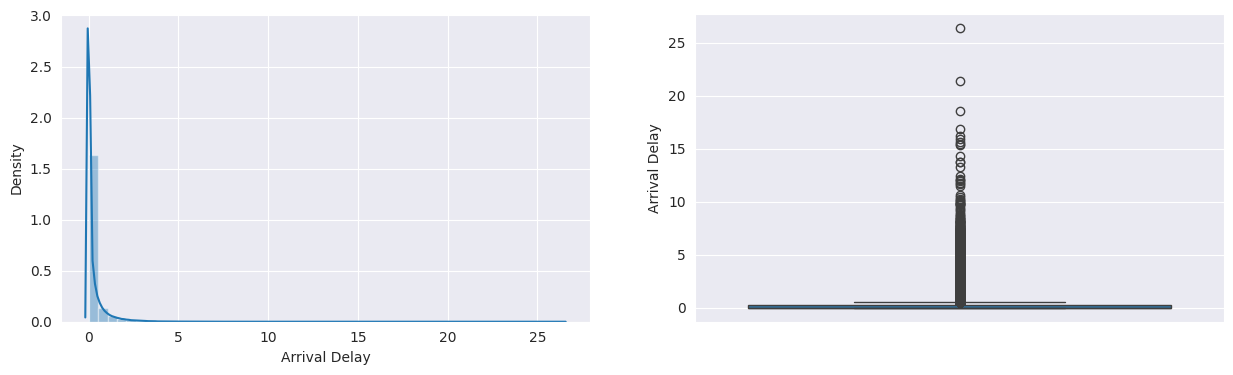

In [79]:
ad_ll, ad_ul = col_distribution(df, 'Arrival Delay')

The distribution is very similar to the Departure delay. So, following the same steps as Departure Delay and analyzing the Arrival Delay feature and encoding it to binary values.

In [80]:
yes_arr_delay = df[df['Arrival Delay'] != 0]
no_arr_delay = df[df['Arrival Delay'] == 0]
print(f"with out delay: {no_arr_delay.shape}")
print(f"With Delay : {yes_arr_delay.shape}")
print(f"No Arrival delay percentage = {no_arr_delay.shape[0]/df.shape[0]*100}")
print(f"Arrival Delay percentage = {yes_arr_delay.shape[0]/df.shape[0]*100}")

with out delay: (72900, 24)
With Delay : (56980, 24)
No Arrival delay percentage = 56.128734216199575
Arrival Delay percentage = 43.87126578380043


56% of the flights had no arrival delay, 43% of the flights had experienced some arrival delay

In [81]:
yes_arr_delay['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,35101
Satisfied,21879


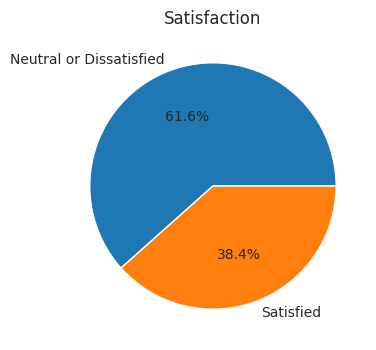

In [82]:
pie_chart(yes_arr_delay, 'Satisfaction')

61% of the passengers who have experienced flight arrival delay are not satisfied with the airlines

In [83]:
no_arr_delay['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,38351
Satisfied,34549


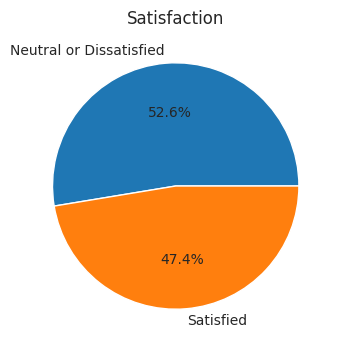

In [84]:
pie_chart(no_arr_delay, 'Satisfaction')

52% of the passengers who have not experienced any flight arrival delay are not satisfied with the airlines

In [85]:
yes_arr_delay['Departure Delay'].describe()

,Departure Delay
count,56980.000000
mean,0.536110
std,0.873744
min,0.000000
25%,0.016667
50%,0.250000
75%,0.666667
max,26.533333


In [86]:
# Binning the arrival delay data
yes_arr_delay['binned_delay'] = pd.cut(yes_arr_delay['Arrival Delay'], bins=20)
binned_arr_delay = pd.DataFrame(yes_arr_delay['binned_delay'].value_counts())
binned_arr_delay.reset_index(inplace=True)
binned_arr_delay.columns = ['binned_delay', 'count']
binned_arr_delay

,binned_delay,count
0,"(-0.00972, 1.336]",50675
1,"(1.336, 2.655]",4490
2,"(2.655, 3.974]",1177
3,"(3.974, 5.293]",377
4,"(5.293, 6.612]",142
5,"(6.612, 7.932]",68
6,"(7.932, 9.251]",18
7,"(9.251, 10.57]",12
8,"(10.57, 11.889]",4
9,"(11.889, 13.208]",4


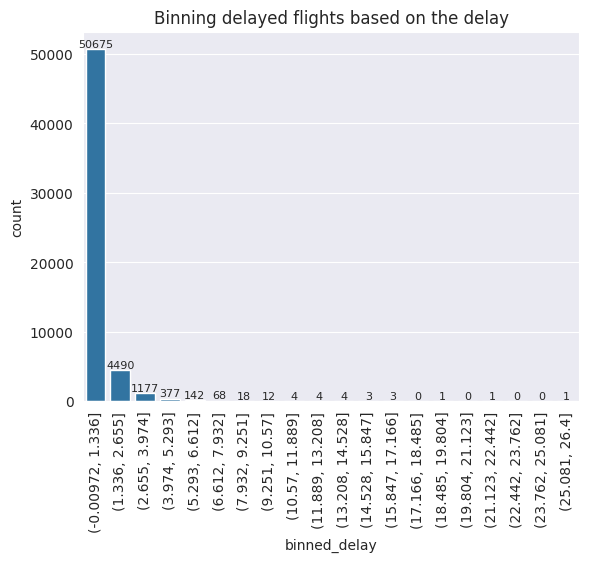

In [87]:
ax = sns.barplot(x='binned_delay', y='count', data=binned_arr_delay)
label = ax.containers[0]
ax.bar_label(label, fontsize=8)
plt.xticks(rotation=90)
plt.title("Binning delayed flights based on the delay")
plt.show()

In [88]:
# Calculating the percentage of flights in the first bin
50675/56980*100

88.93471393471394

In [89]:
# calculating the percentage of flights in rest of the bins
(56524-50408)/56524*100

10.820182577312291

88.9% of the flights have arrived with a delay between 0-1 hours. 10% of the flights have longer than 1 hour of arrival delay

Encoding the Arrival Delay to binay values 0 and 1; where 0 is without delay and 1 is with delay

In [90]:
df['arr_delay_encoded'] = np.where(df['Arrival Delay'] > 0, 1, 0)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,dept_delay_encoded,arr_delay_encoded
0,Male,48,First-time,Business,Business,28.653098,0.033333,0.083333,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1,1
1,Female,35,Returning,Business,Business,28.653098,0.433333,0.650000,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied,1,1
2,Male,41,Returning,Business,Business,29.206164,0.000000,0.000000,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied,0,0
3,Male,50,Returning,Business,Business,43.646306,0.000000,0.000000,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied,0,0
4,Female,49,Returning,Business,Business,58.906706,0.000000,0.016667,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied,0,1


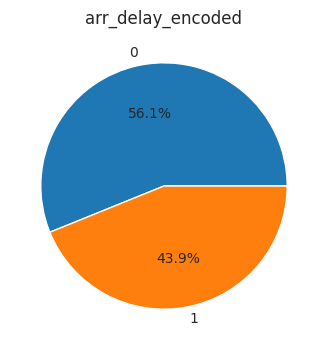

In [91]:
pie_chart(df,'arr_delay_encoded')

56% of the flights have arrived on time and 43.9% of the flights have experienced some delay during arrival.

##### 9. **Departure and Arrival Time Convenience**
 Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means "not applicable"


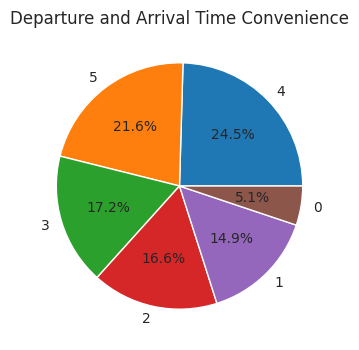

In [92]:
pie_chart(df,'Departure and Arrival Time Convenience')

THe satisfaction rate of the passengers in regards to departure and arrival time is on the higher side (5 and 4), this could be because, as seen earlier, over 50% of the flights have departed and arrived on time without any delay.

'Departure and Arrival Time Convenience' feature with respect to 'Satisfaction'
-----------------------------
Departure and Arrival Time Convenience  Satisfaction           
0                                       Neutral or Dissatisfied     3467
                                        Satisfied                   3214
1                                       Neutral or Dissatisfied     9891
                                        Satisfied                   9518
2                                       Neutral or Dissatisfied    11957
                                        Satisfied                   9577
3                                       Neutral or Dissatisfied    12539
                                        Satisfied                   9839
4                                       Neutral or Dissatisfied    19491
                                        Satisfied                  12389
5                                       Neutral or Dissatisfied    16107
                       

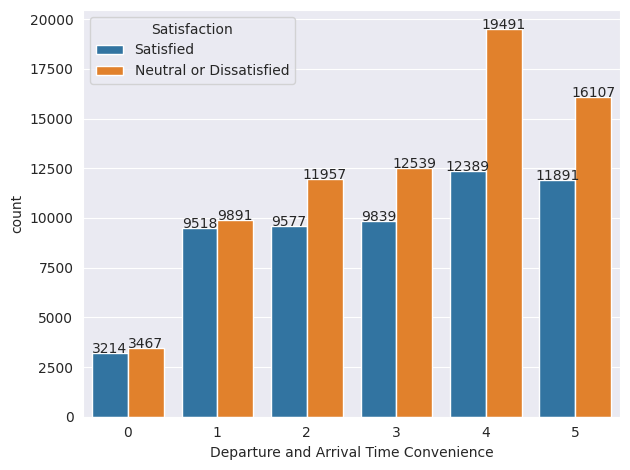

In [93]:
ind_col_vs_dep_col(df, 'Departure and Arrival Time Convenience', 'Satisfaction')

Looking at this plot, for all the ratings 0 to 5, the passengers who are Neutral or Dissatisfied by the overall airline service are more.

##### 10. **Ease of Online Booking**
Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"


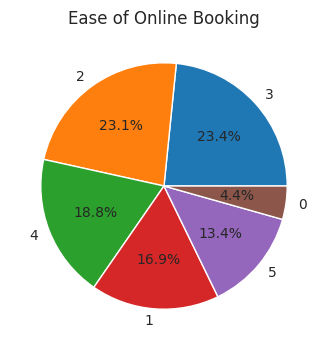

In [94]:
pie_chart(df, 'Ease of Online Booking')

'Ease of Online Booking' feature with respect to 'Satisfaction'
-----------------------------
Ease of Online Booking  Satisfaction           
0                       Satisfied                   3782
                        Neutral or Dissatisfied     1900
1                       Neutral or Dissatisfied    13581
                        Satisfied                   8305
2                       Neutral or Dissatisfied    20931
                        Satisfied                   9120
3                       Neutral or Dissatisfied    20968
                        Satisfied                   9425
4                       Satisfied                  12995
                        Neutral or Dissatisfied    11449
5                       Satisfied                  12801
                        Neutral or Dissatisfied     4623
Name: count, dtype: int64



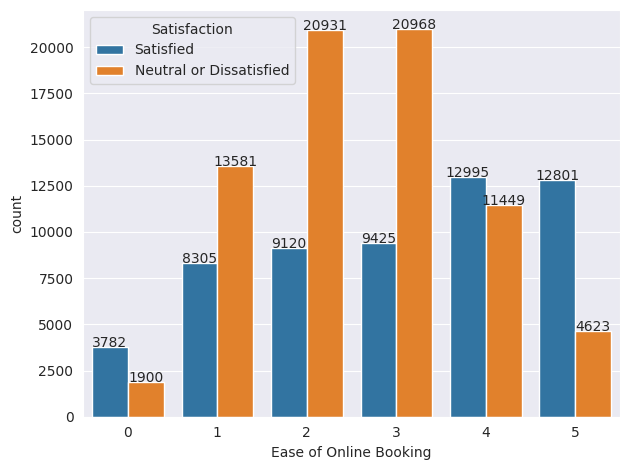

In [95]:
ind_col_vs_dep_col(df, 'Ease of Online Booking', 'Satisfaction')

Again, the Neutral/Dissatisfied count is more but, looking at the pie chart, most of the passengers gave the a average rating of 2-3 to Ease of booking online.

##### 11. **Check-in Service**
Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means "not applicable"


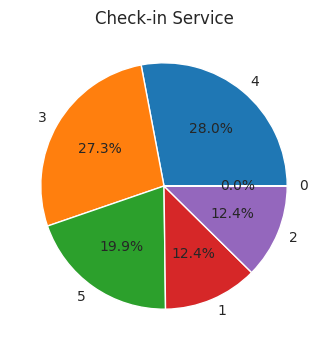

In [96]:
pie_chart(df, 'Check-in Service')

Check-in Service gets a rating of 3-4

'Check-in Service' feature with respect to 'Satisfaction'
-----------------------------
Check-in Service  Satisfaction           
0                 Neutral or Dissatisfied        1
1                 Neutral or Dissatisfied    12249
                  Satisfied                   3859
2                 Neutral or Dissatisfied    12062
                  Satisfied                   4040
3                 Neutral or Dissatisfied    19471
                  Satisfied                  15982
4                 Neutral or Dissatisfied    19619
                  Satisfied                  16714
5                 Satisfied                  15833
                  Neutral or Dissatisfied    10050
Name: count, dtype: int64



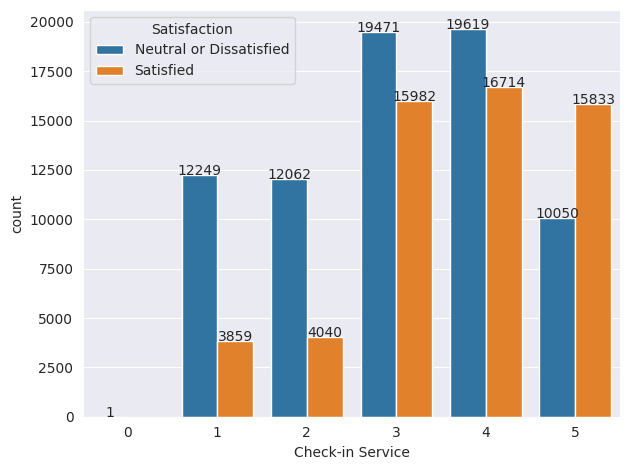

In [97]:
ind_col_vs_dep_col(df, 'Check-in Service', 'Satisfaction')

Most of the passengers are Neutral/Dissatisfied with the Check-in Service of the airlines

##### 12. **Online Boarding**
Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"


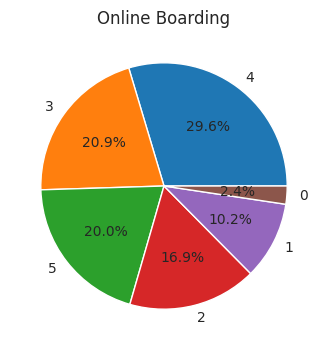

In [98]:
pie_chart(df, 'Online Boarding')

'Online Boarding' feature with respect to 'Satisfaction'
-----------------------------
Online Boarding  Satisfaction           
0                Satisfied                   1739
                 Neutral or Dissatisfied     1341
1                Neutral or Dissatisfied    11434
                 Satisfied                   1827
2                Neutral or Dissatisfied    19422
                 Satisfied                   2512
3                Neutral or Dissatisfied    23385
                 Satisfied                   3732
4                Satisfied                  23966
                 Neutral or Dissatisfied    14502
5                Satisfied                  22652
                 Neutral or Dissatisfied     3368
Name: count, dtype: int64



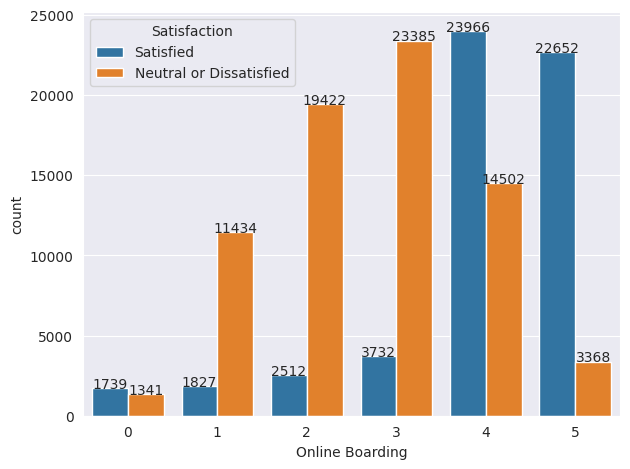

In [99]:
ind_col_vs_dep_col(df, 'Online Boarding', 'Satisfaction')

Overall the Neutral/Dissatisfied count is more, but a good count of passengers have given a higher rating to the online boarding service provided by the airlines.

This can infer that compared to the Check-in Service (Physical check in at the airport) the Online boarding service (online checkin) is more preferred by the passengers

13. **Gate Location**
Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"


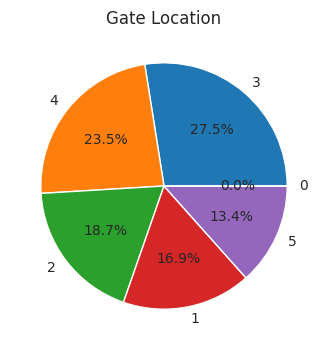

In [100]:
pie_chart(df, 'Gate Location')

'Gate Location' feature with respect to 'Satisfaction'
-----------------------------
Gate Location  Satisfaction           
0              Satisfied                      1
1              Neutral or Dissatisfied    11020
               Satisfied                  10971
2              Neutral or Dissatisfied    13028
               Satisfied                  11268
3              Neutral or Dissatisfied    23321
               Satisfied                  12396
4              Neutral or Dissatisfied    18563
               Satisfied                  11903
5              Satisfied                   9889
               Neutral or Dissatisfied     7520
Name: count, dtype: int64



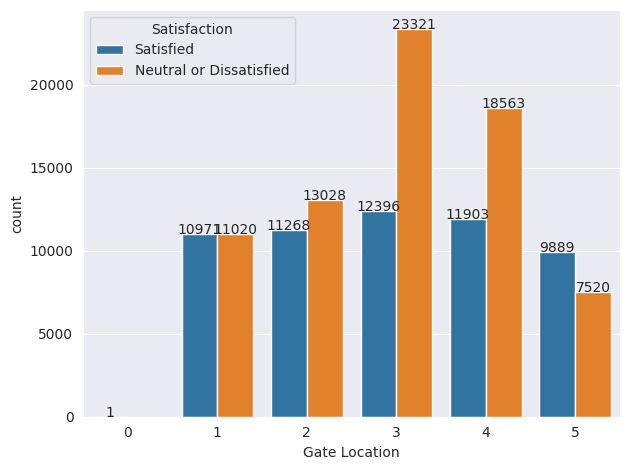

In [101]:
ind_col_vs_dep_col(df, 'Gate Location', 'Satisfaction')

Passengers were Neutral/Dissatisfied with the gate location

#####13. **On-board Service**
Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"


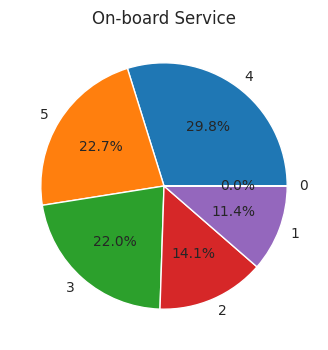

In [102]:
pie_chart(df, 'On-board Service')

'On-board Service' feature with respect to 'Satisfaction'
-----------------------------
On-board Service  Satisfaction           
0                 Neutral or Dissatisfied        5
1                 Neutral or Dissatisfied    11879
                  Satisfied                   2908
2                 Neutral or Dissatisfied    13663
                  Satisfied                   4688
3                 Neutral or Dissatisfied    19463
                  Satisfied                   9079
4                 Satisfied                  20690
                  Neutral or Dissatisfied    18013
5                 Satisfied                  19063
                  Neutral or Dissatisfied    10429
Name: count, dtype: int64



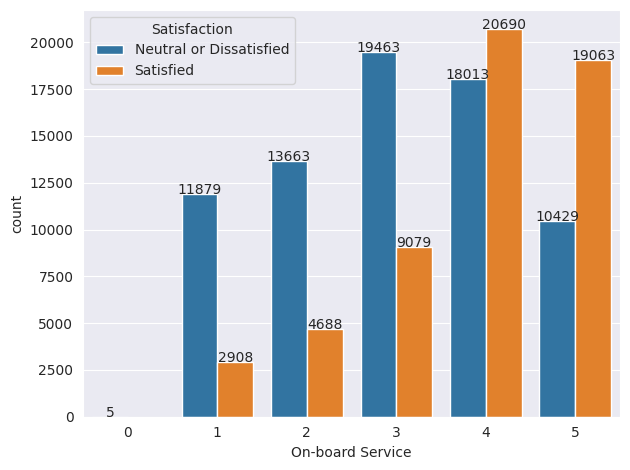

In [103]:
ind_col_vs_dep_col(df, 'On-board Service', 'Satisfaction')

On-Boarding Service is overall Neutral/Dissatisfied, but some passengers gave a higher rating of 4-5

#####14. **Seat Comfort**

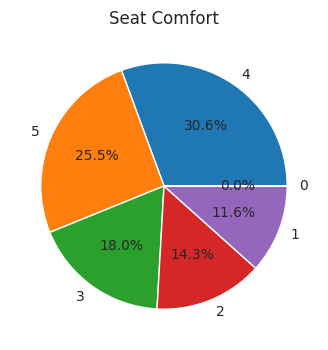

In [104]:
pie_chart(df, 'Seat Comfort')

'Seat Comfort' feature with respect to 'Satisfaction'
-----------------------------
Seat Comfort  Satisfaction           
0             Neutral or Dissatisfied        1
1             Neutral or Dissatisfied    11734
              Satisfied                   3374
2             Neutral or Dissatisfied    14341
              Satisfied                   4188
3             Neutral or Dissatisfied    18334
              Satisfied                   4994
4             Satisfied                  22275
              Neutral or Dissatisfied    17481
5             Satisfied                  21597
              Neutral or Dissatisfied    11561
Name: count, dtype: int64



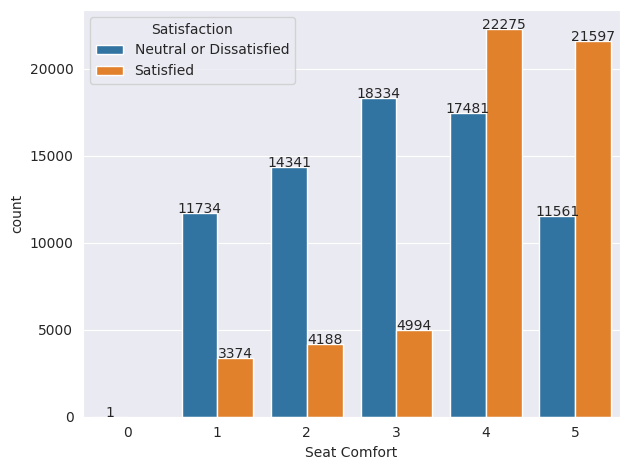

In [105]:
ind_col_vs_dep_col(df, 'Seat Comfort', 'Satisfaction')

#####15. **Leg Room Service**
Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"


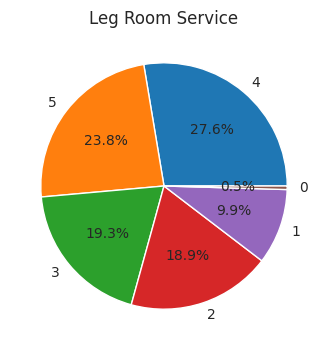

In [106]:
pie_chart(df, 'Leg Room Service')

'Leg Room Service' feature with respect to 'Satisfaction'
-----------------------------
Leg Room Service  Satisfaction           
0                 Neutral or Dissatisfied      392
                  Satisfied                    206
1                 Neutral or Dissatisfied    10263
                  Satisfied                   2632
2                 Neutral or Dissatisfied    17785
                  Satisfied                   6755
3                 Neutral or Dissatisfied    18139
                  Satisfied                   6917
4                 Satisfied                  20925
                  Neutral or Dissatisfied    14961
5                 Satisfied                  18993
                  Neutral or Dissatisfied    11912
Name: count, dtype: int64



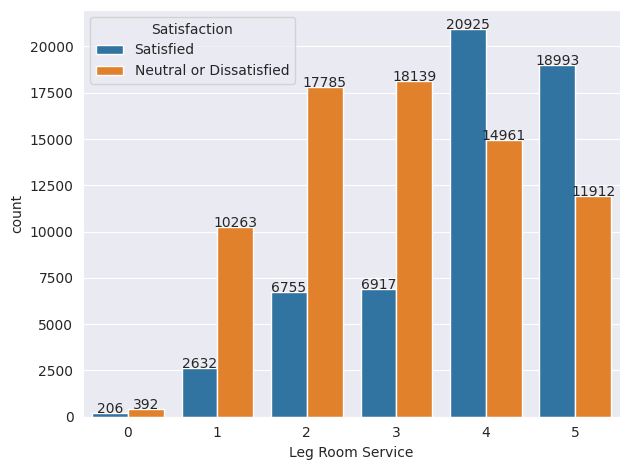

In [107]:
ind_col_vs_dep_col(df, 'Leg Room Service', 'Satisfaction')

#####16. **Cleanliness**
Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"


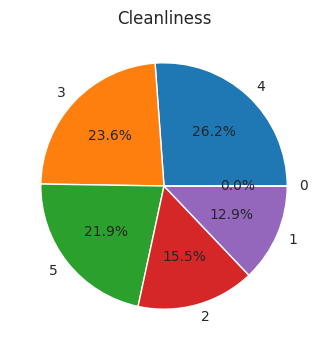

In [108]:
pie_chart(df, 'Cleanliness')


'Cleanliness' feature with respect to 'Satisfaction'
-----------------------------
Cleanliness  Satisfaction           
0            Neutral or Dissatisfied       14
1            Neutral or Dissatisfied    13434
             Satisfied                   3295
2            Neutral or Dissatisfied    15836
             Satisfied                   4277
3            Neutral or Dissatisfied    17370
             Satisfied                  13269
4            Satisfied                  18183
             Neutral or Dissatisfied    15786
5            Satisfied                  17404
             Neutral or Dissatisfied    11012
Name: count, dtype: int64



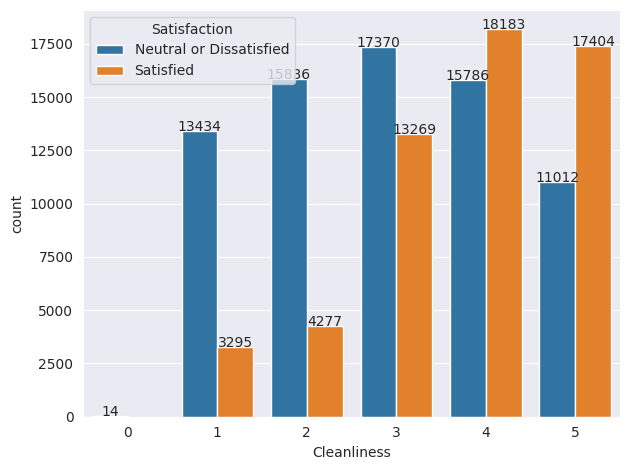

In [109]:
ind_col_vs_dep_col(df, 'Cleanliness', 'Satisfaction')

#####17. **Food and Drink**
Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"


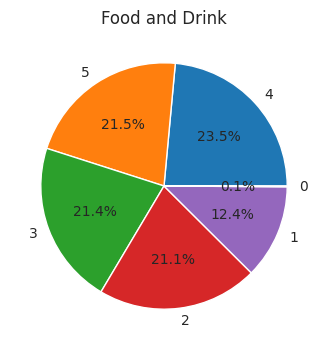

In [110]:
pie_chart(df, 'Food and Drink')

'Food and Drink' feature with respect to 'Satisfaction'
-----------------------------
Food and Drink  Satisfaction           
0               Neutral or Dissatisfied       77
                Satisfied                     55
1               Neutral or Dissatisfied    12848
                Satisfied                   3203
2               Neutral or Dissatisfied    16731
                Satisfied                  10652
3               Neutral or Dissatisfied    16748
                Satisfied                  11046
4               Satisfied                  16071
                Neutral or Dissatisfied    14492
5               Satisfied                  15401
                Neutral or Dissatisfied    12556
Name: count, dtype: int64



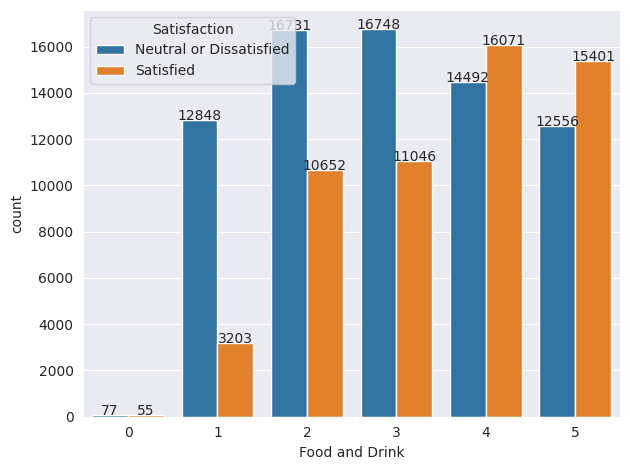

In [111]:
ind_col_vs_dep_col(df, 'Food and Drink', 'Satisfaction')

#####18. **In-flight Service**
Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means "not applicable"


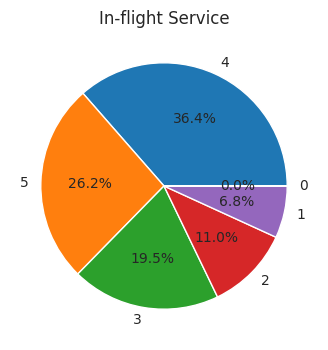

In [112]:
pie_chart(df, 'In-flight Service')

'In-flight Service' feature with respect to 'Satisfaction'
-----------------------------
In-flight Service  Satisfaction           
0                  Neutral or Dissatisfied        5
1                  Neutral or Dissatisfied     6274
                   Satisfied                   2588
2                  Neutral or Dissatisfied    10003
                   Satisfied                   4305
3                  Neutral or Dissatisfied    19233
                   Satisfied                   6083
4                  Neutral or Dissatisfied    24691
                   Satisfied                  22632
5                  Satisfied                  20820
                   Neutral or Dissatisfied    13246
Name: count, dtype: int64



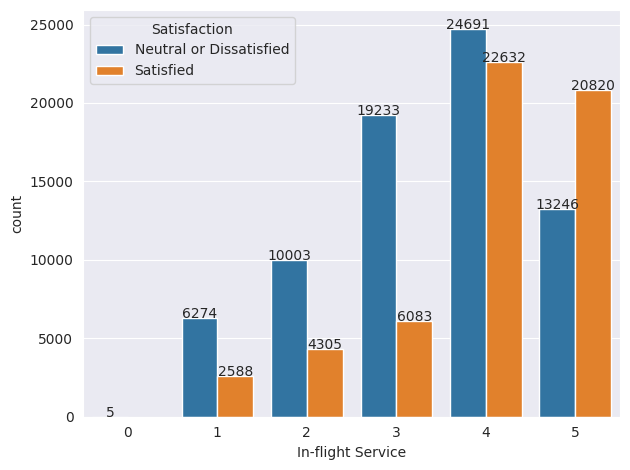

In [113]:
ind_col_vs_dep_col(df, 'In-flight Service', 'Satisfaction')

#####18. **In-flight Wifi Service**
Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means "not applicable"


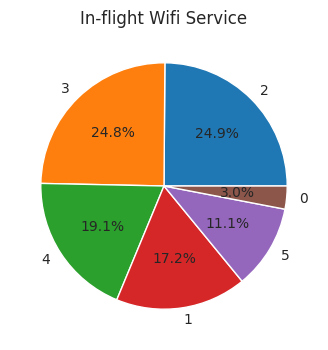

In [114]:
pie_chart(df, 'In-flight Wifi Service')

'In-flight Wifi Service' feature with respect to 'Satisfaction'
-----------------------------
In-flight Wifi Service  Satisfaction           
0                       Satisfied                   3906
                        Neutral or Dissatisfied       10
1                       Neutral or Dissatisfied    15000
                        Satisfied                   7328
2                       Neutral or Dissatisfied    24330
                        Satisfied                   7990
3                       Neutral or Dissatisfied    24080
                        Satisfied                   8105
4                       Satisfied                  14884
                        Neutral or Dissatisfied     9891
5                       Satisfied                  14215
                        Neutral or Dissatisfied      141
Name: count, dtype: int64



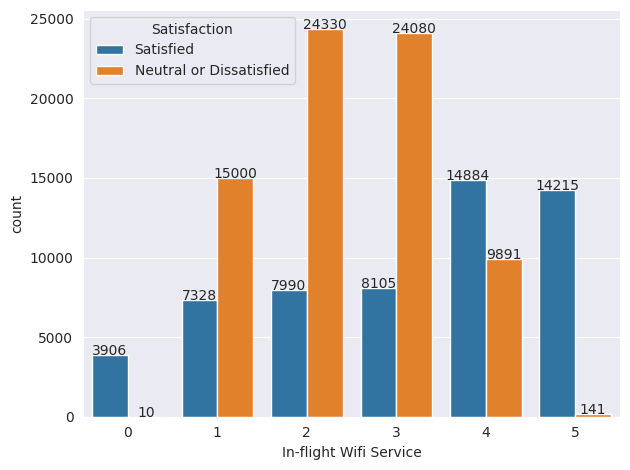

In [115]:
ind_col_vs_dep_col(df, 'In-flight Wifi Service', 'Satisfaction')

#####19. In-flight Entertainment
Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means "not applicable"


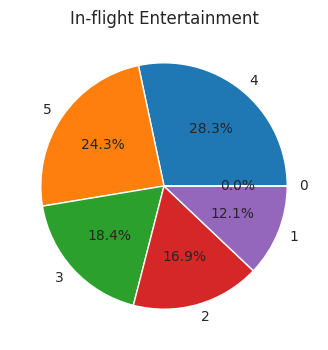

In [116]:
pie_chart(df, 'In-flight Entertainment')

'In-flight Entertainment' feature with respect to 'Satisfaction'
-----------------------------
In-flight Entertainment  Satisfaction           
0                        Neutral or Dissatisfied       18
1                        Neutral or Dissatisfied    13450
                         Satisfied                   2225
2                        Neutral or Dissatisfied    17296
                         Satisfied                   4672
3                        Neutral or Dissatisfied    17360
                         Satisfied                   6524
4                        Satisfied                  22484
                         Neutral or Dissatisfied    14307
5                        Satisfied                  20523
                         Neutral or Dissatisfied    11021
Name: count, dtype: int64



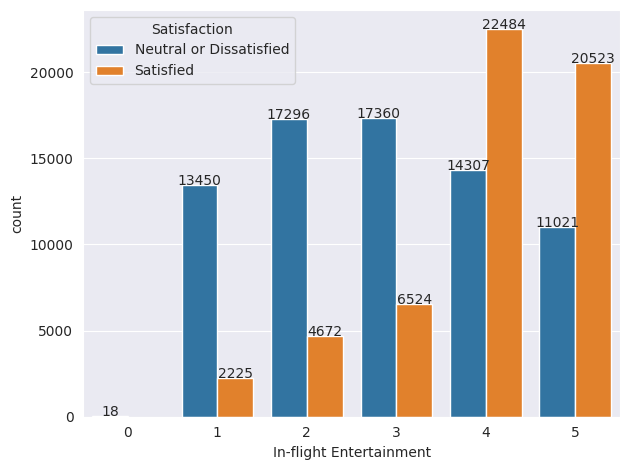

In [117]:
ind_col_vs_dep_col(df, 'In-flight Entertainment', 'Satisfaction')

#####20. Baggage Handling
Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means "not applicable“



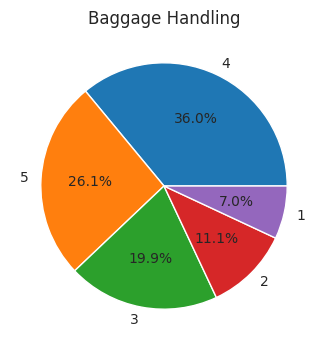

In [118]:
pie_chart(df, 'Baggage Handling')

'Baggage Handling' feature with respect to 'Satisfaction'
-----------------------------
Baggage Handling  Satisfaction           
1                 Neutral or Dissatisfied     6317
                  Satisfied                   2711
2                 Neutral or Dissatisfied    10138
                  Satisfied                   4224
3                 Neutral or Dissatisfied    19699
                  Satisfied                   6152
4                 Neutral or Dissatisfied    24286
                  Satisfied                  22475
5                 Satisfied                  20866
                  Neutral or Dissatisfied    13012
Name: count, dtype: int64



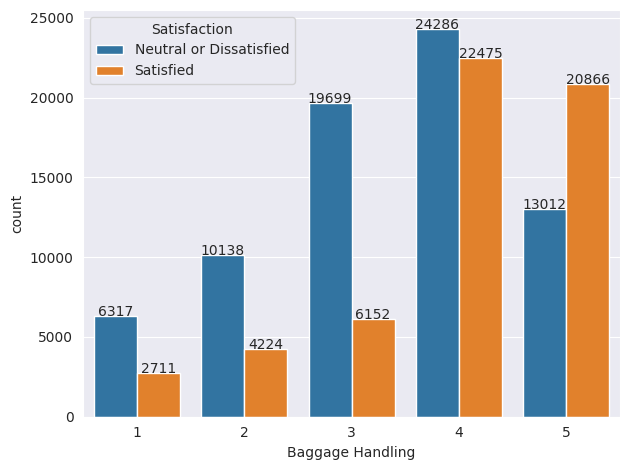

In [119]:
ind_col_vs_dep_col(df, 'Baggage Handling', 'Satisfaction')

THe features 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service','In-flight Entertainment', 'Baggage Handling'

All these features have a higher rating of 4-5 but the overall rating is Neutral/Dissatisfied

In [120]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'dept_delay_encoded', 'arr_delay_encoded'],
      dtype='object')

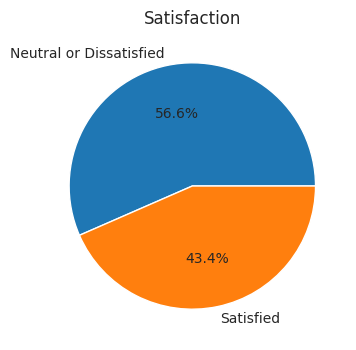

In [121]:
plt.figure(figsize=(15,4))
plt.pie(df['Satisfaction'].value_counts(), labels=df['Satisfaction'].value_counts().index, autopct='%1.1f%%')
plt.title('Satisfaction')
plt.show()

The data shows more passengers have a Neutral or Dissatisfied opinion compared to Satisfied passengers. However the data is not very imbalanced as the difference between the classes is not very significant.

In [122]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,dept_delay_encoded,arr_delay_encoded
0,Male,48,First-time,Business,Business,28.653098,0.033333,0.083333,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1,1
1,Female,35,Returning,Business,Business,28.653098,0.433333,0.650000,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied,1,1
2,Male,41,Returning,Business,Business,29.206164,0.000000,0.000000,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied,0,0
3,Male,50,Returning,Business,Business,43.646306,0.000000,0.000000,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied,0,0
4,Female,49,Returning,Business,Business,58.906706,0.000000,0.016667,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied,0,1


#### Encoding the object type data using label encoder

In [123]:
obj_columns = df.select_dtypes(include='object').columns
obj_columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')

In [124]:
for i in obj_columns:
  df = label_encode(df,i)

In [125]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,dept_delay_encoded,arr_delay_encoded
0,1,48,0,0,0,28.653098,0.033333,0.083333,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,1,1
1,0,35,1,0,0,28.653098,0.433333,0.650000,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1,1
2,1,41,1,0,0,29.206164,0.000000,0.000000,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,0
3,1,50,1,0,0,43.646306,0.000000,0.000000,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,0
4,0,49,1,0,0,58.906706,0.000000,0.016667,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,0,1


Deleting the "Departure Delay" and "Arrival Delay" features as they were converted to categorical columns earlier. Also they have a high vif score.

In [126]:
df=df.drop(['Departure Delay', 'Arrival Delay'], axis=1)

In [127]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,dept_delay_encoded,arr_delay_encoded
0,1,48,0,0,0,28.653098,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,1,1
1,0,35,1,0,0,28.653098,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1,1
2,1,41,1,0,0,29.206164,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,0
3,1,50,1,0,0,43.646306,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,0
4,0,49,1,0,0,58.906706,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,0,1


#### Scaling the data
Using Standard Scaler

In [128]:
x = df.copy()
y = df['Satisfaction']

In [129]:
x = x.drop(['Satisfaction'], axis=1)

In [130]:
x.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,dept_delay_encoded,arr_delay_encoded
0,1,48,0,0,0,28.653098,3,3,4,3,3,3,5,2,5,5,5,3,5,5,1,1
1,0,35,1,0,0,28.653098,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1
2,1,41,1,0,0,29.206164,4,4,4,5,4,3,5,3,5,5,3,4,3,3,0,0
3,1,50,1,0,0,43.646306,2,2,3,4,2,5,5,5,4,4,5,2,5,5,0,0
4,0,49,1,0,0,58.906706,3,3,3,5,3,3,4,4,5,4,3,3,3,3,0,1


In [131]:
y.head()

,Satisfaction
0,0
1,1
2,1
3,1
4,1


In [132]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns = x.columns)
x_scaled.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,dept_delay_encoded,arr_delay_encoded
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.211004,-0.037727,0.173445,0.547894,-0.187037,0.018048,-0.297587,1.181428,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,1.139204,1.131104
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.211004,-0.692719,-0.539957,-0.241883,1.293662,-0.764109,1.256300,0.423441,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.139204,1.131104
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.170942,0.617265,0.886847,0.547894,1.293662,0.800206,-0.297587,1.181428,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,-0.877806,-0.884092
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.875058,-0.692719,-0.539957,-0.241883,0.553313,-0.764109,1.256300,1.181428,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,-0.877806,-0.884092
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,1.980474,-0.037727,0.173445,-0.241883,1.293662,0.018048,-0.297587,0.423441,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,-0.877806,1.131104


#### Heatmap - Correlation

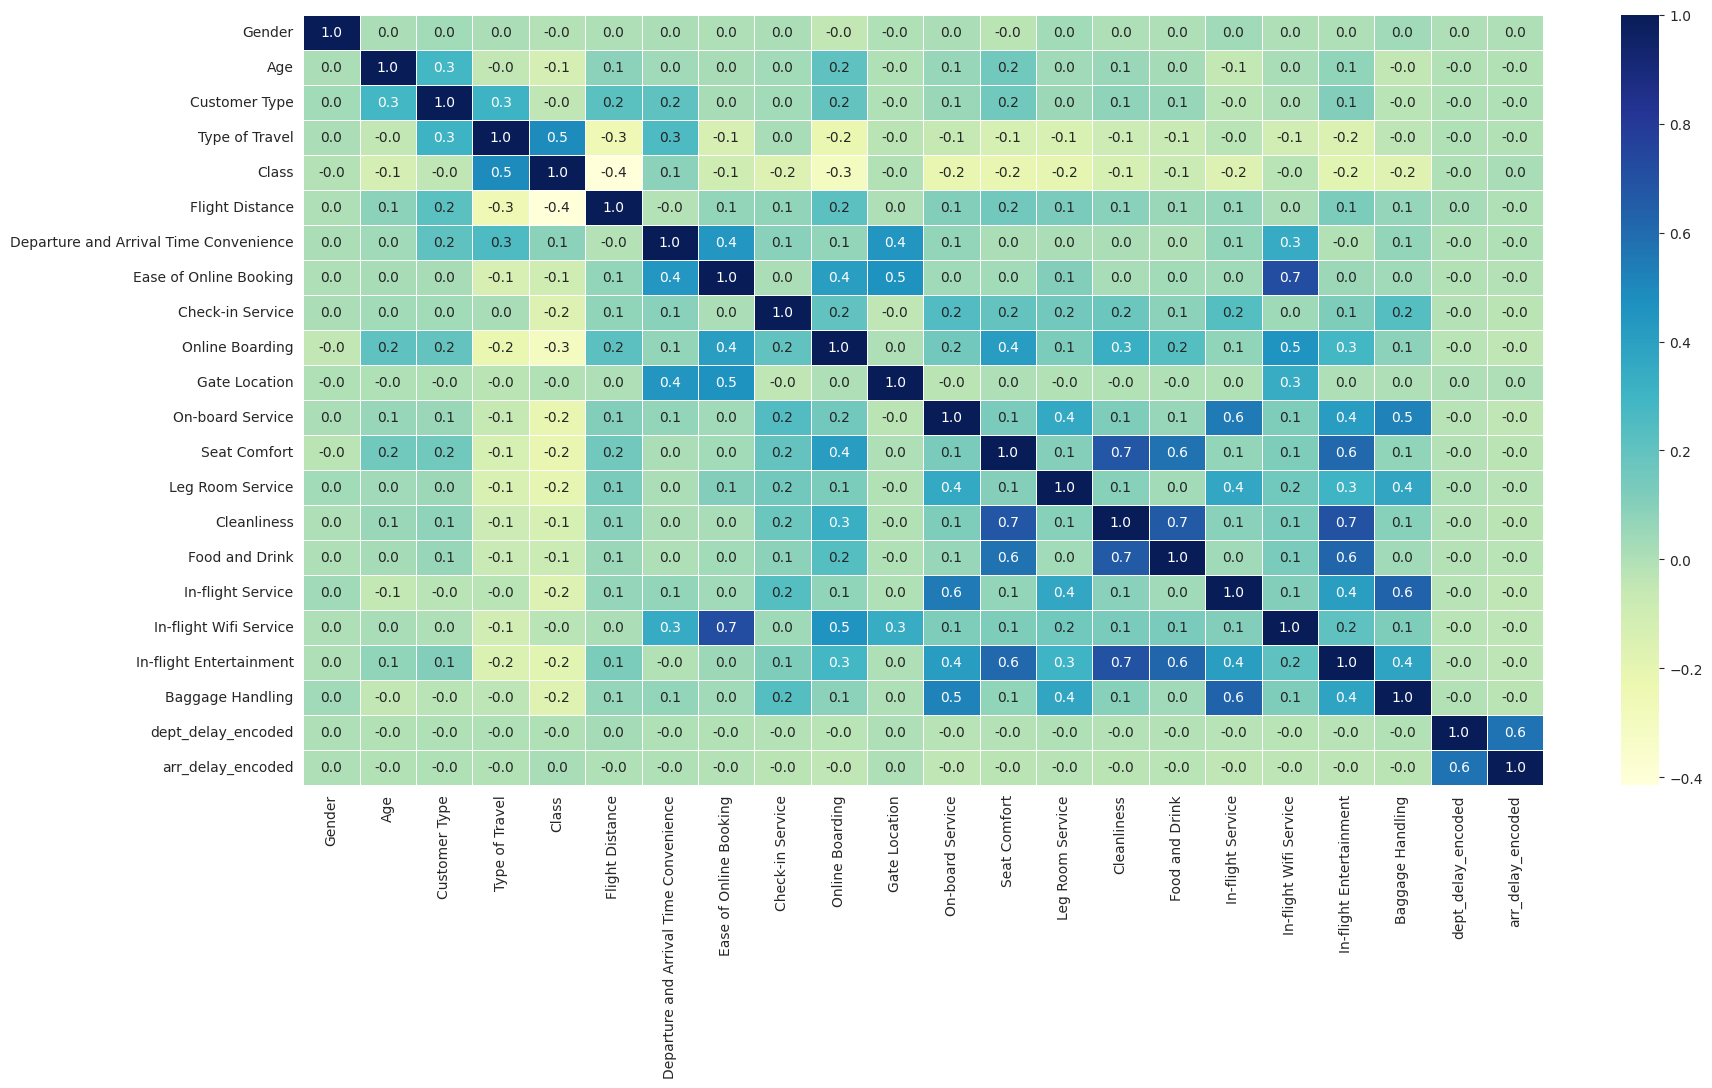

In [133]:
fig = plt.gcf() # Get the current figure
fig.set_size_inches(20,10) # set the size in inches
sns.heatmap(x_scaled.corr(), annot=True, fmt=".1f", linewidths=0.5, cmap="YlGnBu")
plt.show()

Some features here are highly positively correlated.
* Cleanliness with In-flight Entertainment, Food and Drink, Seat Comfort.
* Ease of online booking with in-flight wifi service
* On-board Service with In-flight service
* In-flight service with baggage handling
* In-flight wifi service with Ease of online booking


#### Feature selection


##### Using SelectKBest and applying the Chi2 test.

In [134]:
feature_scores = select_k_best(x,y,chi2,15,15)

In [135]:
print(feature_scores)

                   Features        Scores
5           Flight Distance  63090.107236
9           Online Boarding  18340.344018
3            Type of Travel  18151.634190
4                     Class  16962.711907
1                       Age  13539.489346
18  In-flight Entertainment  10916.107121
12             Seat Comfort   7993.086356
17   In-flight Wifi Service   6758.344596
11         On-board Service   6602.710135
13         Leg Room Service   6554.605643
14              Cleanliness   6429.597796
8          Check-in Service   3545.003037
15           Food and Drink   3201.587723
19         Baggage Handling   3079.235957
16        In-flight Service   2961.593917


In [136]:
chi2_features = pd.DataFrame(feature_scores)
chi2_features

,Features,Scores
5,Flight Distance,63090.107236
9,Online Boarding,18340.344018
3,Type of Travel,18151.634190
4,Class,16962.711907
1,Age,13539.489346
18,In-flight Entertainment,10916.107121
12,Seat Comfort,7993.086356
17,In-flight Wifi Service,6758.344596
11,On-board Service,6602.710135
13,Leg Room Service,6554.605643


In [137]:
chi2_df = x[chi2_features['Features']]
chi2_df.head()

,Flight Distance,Online Boarding,Type of Travel,Class,Age,In-flight Entertainment,Seat Comfort,In-flight Wifi Service,On-board Service,Leg Room Service,Cleanliness,Check-in Service,Food and Drink,Baggage Handling,In-flight Service
0,28.653098,3,0,0,48,5,5,3,3,2,5,4,5,5,5
1,28.653098,5,0,0,35,5,4,2,5,5,5,3,3,5,5
2,29.206164,5,0,0,41,3,5,4,3,3,5,4,5,3,3
3,43.646306,4,0,0,50,5,5,2,5,5,4,3,4,5,5
4,58.906706,5,0,0,49,3,4,3,3,4,5,3,4,3,3


Scaling this chi2_df data

In [138]:
x_chi2 = scaler.fit_transform(chi2_df)
x_chi2 = pd.DataFrame(x_chi2,columns = chi2_df.columns)
x_chi2.head()

,Flight Distance,Online Boarding,Type of Travel,Class,Age,In-flight Entertainment,Seat Comfort,In-flight Wifi Service,On-board Service,Leg Room Service,Cleanliness,Check-in Service,Food and Drink,Baggage Handling,In-flight Service
0,-0.211004,-0.187037,-0.669366,-0.955724,0.566960,1.230787,1.181428,0.204090,-0.297587,-1.026310,1.304487,0.547894,1.349867,1.159206,1.153946
1,-0.211004,1.293662,-0.669366,-0.955724,-0.292868,1.230787,0.423441,-0.548166,1.256300,1.252898,1.304487,-0.241883,-0.153973,1.159206,1.153946
2,-0.170942,1.293662,-0.669366,-0.955724,0.103976,-0.268414,1.181428,0.956346,-0.297587,-0.266574,1.304487,0.547894,1.349867,-0.535681,-0.545774
3,0.875058,0.553313,-0.669366,-0.955724,0.699242,1.230787,1.181428,-0.548166,1.256300,1.252898,0.543264,-0.241883,0.597947,1.159206,1.153946
4,1.980474,1.293662,-0.669366,-0.955724,0.633101,-0.268414,0.423441,0.204090,-0.297587,0.493162,1.304487,-0.241883,0.597947,-0.535681,-0.545774


##### Using PCA.

In [139]:
pca, x_pca, pca_loadings = apply_pca(x_scaled,True,15)

In [140]:
pca

PCA(n_components=15)

In [141]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,2.143570,-0.930284,-0.409820,-0.144565,1.601728,-1.974224,0.815414,0.434549,0.853123,1.570090,-1.228914,0.500293,-0.850845,1.076436,-0.015143
1,2.452854,-1.748782,0.958048,-0.508935,1.627003,-0.079125,-1.026202,0.035627,-0.964575,-0.543625,-0.043937,-1.112989,-0.127254,-0.232425,-0.314736
2,1.984100,1.262859,-1.975982,-0.320420,-1.258026,-0.086766,0.766479,0.481140,1.087736,0.263819,0.045908,-0.787633,0.053545,-0.012685,0.005935
3,2.827182,-1.946126,0.837605,-0.384321,-1.117896,0.786637,1.127596,0.354181,-0.746812,-0.080757,-0.035548,-0.056880,-0.030804,0.045190,-0.190894
4,1.475575,0.076476,-1.569133,-1.788905,0.048647,0.885547,-0.523051,-0.829358,-0.259547,-0.554464,0.438440,0.407189,-0.001518,0.269884,1.110101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.426123,0.969443,1.357986,2.540997,1.896760,-0.222016,0.025544,1.732488,0.176293,-1.548866,-0.204861,0.848782,0.872636,-0.019732,0.568890
129876,-0.750681,1.638774,2.635459,2.618060,-0.879001,1.026160,0.139337,1.060536,0.650013,0.321553,0.995652,0.561798,0.362439,-0.589117,-0.109230
129877,-1.171137,-0.466254,1.034006,2.710890,1.952713,0.788224,0.256163,1.255763,0.339884,-0.309341,0.505476,0.612826,-0.336187,1.297864,-0.053355
129878,0.452239,1.130048,0.824903,2.047609,1.814524,0.539169,-0.262237,2.814688,-0.881400,-1.188791,0.439837,0.805545,-0.068842,0.713177,-0.250957


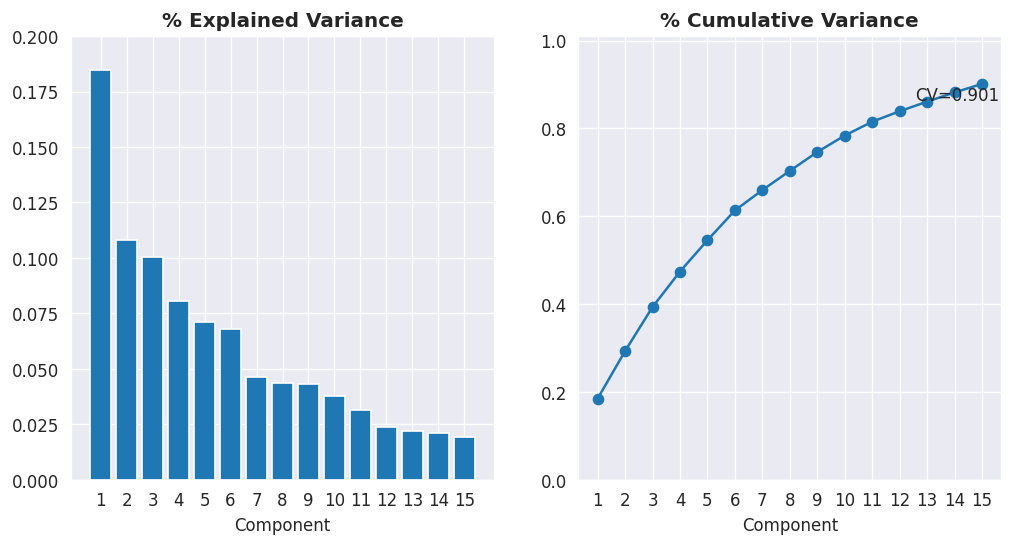

In [142]:
plot_pca_variance(pca)

In [143]:
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Gender,0.005068,-0.000285,0.046855,0.025939,0.015710,0.045636,0.835339,0.468493,0.257838,-0.007769,-0.053197,-0.000158,0.032349,-0.028269,-0.038448
Age,0.082390,0.021232,-0.121498,-0.097874,-0.009785,0.463046,-0.060602,0.302191,-0.341602,0.633213,-0.020303,0.299407,-0.066806,0.159531,0.028369
Customer Type,0.083250,0.061866,-0.115852,0.140412,0.053909,0.647341,0.075560,-0.082169,-0.126063,-0.263674,0.005642,-0.320768,-0.097333,-0.264982,0.173924
Type of Travel,-0.138102,0.057471,0.008012,0.560381,0.072026,0.284566,-0.059972,-0.011940,0.071076,-0.207108,-0.001740,0.017021,-0.050131,0.006498,-0.085769
Class,-0.216555,0.072082,-0.057490,0.487009,0.043858,-0.105361,-0.090674,0.189481,-0.131262,-0.105261,0.081229,0.560049,0.002062,-0.217440,-0.019742
Flight Distance,0.153819,-0.030189,-0.008798,-0.375023,0.003556,0.297746,0.183815,-0.420178,0.103781,-0.329275,-0.036377,0.625093,0.016391,0.022731,0.001305
Departure and Arrival Time Convenience,0.073600,0.438384,0.033786,0.249234,0.063876,0.149023,0.071840,-0.262647,0.147985,0.129696,0.001758,-0.107492,0.216494,0.607400,-0.117777
Ease of Online Booking,0.156085,0.530429,-0.010457,-0.110238,-0.012680,-0.112072,-0.024169,0.107752,-0.022438,-0.117472,-0.016203,0.042178,0.015022,0.045073,0.079344
Check-in Service,0.174158,-0.048048,0.129920,0.056482,0.006208,0.139060,-0.289132,0.112879,0.780363,0.222362,0.232113,0.140205,-0.002585,-0.129944,0.149932
Online Boarding,0.293821,0.157410,-0.160984,-0.196160,-0.045144,0.115770,-0.271407,0.351362,0.076062,-0.227488,-0.175497,-0.126606,-0.113021,-0.103452,-0.175307


#### Splitting the data to train test split

##### Original Dataset
Using the scaled df with all the features

In [144]:
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

##### Chi2 dataset
Using the dataset with best features selected based on Chi2 test

In [145]:
x_train_chi2, x_test_chi2, y_train_chi2, y_test_chi2 = train_test_split(x_chi2, y, test_size=0.2, random_state=42)

##### PCA Dataset
Using the dataset generated after applying PCA with n_components=15

In [146]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=42)

#### Model pipeline
Building models with original dataset, passing through pipeline. The pipeline is going to run 4 models: Logistic Regression, Decision Tree classifier, Random Forest classifier and XGBoost classifier

In [147]:
model_pipeline(x_train_df, y_train_df, x_test_df, y_test_df)


LOGISTIC REGRESSION CLASSIFICATION REPORT:

*************** Train Data **************
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     58729
           1       0.87      0.83      0.85     45175

    accuracy                           0.87    103904
   macro avg       0.87      0.87      0.87    103904
weighted avg       0.87      0.87      0.87    103904


*************** Test Data ***************
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14723
           1       0.87      0.84      0.85     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976


*************** Confusion Matrix ***************
[[13295  1428]
 [ 1824  9429]]

----------------------------------------------------------------------

DECISION TREE CLASSIFICATION REPORT:

*************** Train Da

Accuracy scores using the original dataset without any feature engineering:
* Logistic Regression: 87% for both training and testing
* Decision tree: 100% for training data and 95% for testing data
* Random forest: 100% for training data and 96% for testing data
* xgboost: 98% for training data and 96% for testing data.

96% is the highest accuracy score for test data.Both Random forest and XGBoost are acheiving this score.

Building models with chi2 dataset, passing through pipeline.

In [148]:
model_pipeline(x_train_chi2, y_train_chi2, x_test_chi2, y_test_chi2)


LOGISTIC REGRESSION CLASSIFICATION REPORT:

*************** Train Data **************
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     58729
           1       0.84      0.82      0.83     45175

    accuracy                           0.86    103904
   macro avg       0.85      0.85      0.85    103904
weighted avg       0.86      0.86      0.86    103904


*************** Test Data ***************
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14723
           1       0.85      0.82      0.83     11253

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.86     25976
weighted avg       0.86      0.86      0.86     25976


*************** Confusion Matrix ***************
[[13045  1678]
 [ 1999  9254]]

----------------------------------------------------------------------

DECISION TREE CLASSIFICATION REPORT:

*************** Train Da

Accuracy scores using the dataset generated from the Select KBest method by applying Chi2 test.
* logistic Regression: 86% for training and testing data
* Decision Tree: 100% training data and 93% on testing data
* Random Forest: 100% on training data and 96% on testing data
* XGBoost: 96% on both training and testing data

96% is the higest accuracy score on test data acheived by Random forest and XGBoost

Building models with pca dataset, passing through pipeline.

In [149]:
model_pipeline(x_train_pca, y_train_pca, x_test_pca, y_test_pca)


LOGISTIC REGRESSION CLASSIFICATION REPORT:

*************** Train Data **************
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     58729
           1       0.85      0.81      0.83     45175

    accuracy                           0.86    103904
   macro avg       0.86      0.85      0.85    103904
weighted avg       0.86      0.86      0.86    103904


*************** Test Data ***************
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14723
           1       0.85      0.82      0.83     11253

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.85     25976
weighted avg       0.86      0.86      0.86     25976


*************** Confusion Matrix ***************
[[13066  1657]
 [ 2046  9207]]

----------------------------------------------------------------------

DECISION TREE CLASSIFICATION REPORT:

*************** Train Da

Accuracy scores using the dataset generated after applying PCA technique.
* Logistic Regression: 86% for both training and testing data
* Decision Tree: 100% training data and 88% testing data. The model could be overfitting here.
* Random Forest: 100% on training data and 93% on testing data
* XGBoost: 96% on training data and 93% on testing data.

93% is the highest accuracy score, both Random forest and XGBoost are achieiving this score.

In [150]:
# Models and hyperparameters
models = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42),
        "params": {
            "classifier__penalty": ["l1", "l2", 'none'],
            "classifier__C": [100, 10, 1.0, 0.1, 0.01]
          }
        },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "classifier__max_depth": [3, 5, 10, None],
            "classifier__min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100],
            "classifier__max_depth": [5, 10, None],
            "classifier__min_samples_split": [2, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100],
            "classifier__max_depth": [3, 5, 7],
            "classifier__learning_rate": [0.01, 0.1, 0.2]
        }
    }
}

Grid Search CV:

Using the original dataset with all the features included.

In [151]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
for name, cfg in models.items():
    print(f"\n🔍 Running Grid Search for {name}...")
    pipe = Pipeline([
        ("classifier", cfg["model"])
    ])
    grid = GridSearchCV(pipe, cfg["params"], cv=5, scoring="accuracy", n_jobs=-1)
    with tqdm(desc=f"{name} Progress...", total=len(cfg["params"])*3) as pbar:
      grid.fit(x_train_df, y_train_df)
      # Update the progress bar in each iteration
      for i in range(len(cfg["params"]) * 3):
        pbar.update(1)

    print(f"✅ Best Parameters for {name}:\n {grid.best_params_}")
    y_pred_df = grid.predict(x_test_df)
    print(f"\n📊 Classification Report for {name}:\n")
    print(classification_report(y_test_df, y_pred_df))


🔍 Running Grid Search for Logistic Regression...


Logistic Regression Progress...: 100%|██████████| 6/6 [00:08<00:00,  1.42s/it]


✅ Best Parameters for Logistic Regression:
 {'classifier__C': 100, 'classifier__penalty': 'l2'}

📊 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14723
           1       0.87      0.84      0.85     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976


🔍 Running Grid Search for Decision Tree...


Decision Tree Progress...: 100%|██████████| 6/6 [00:18<00:00,  3.15s/it]


✅ Best Parameters for Decision Tree:
 {'classifier__max_depth': None, 'classifier__min_samples_split': 10}

📊 Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14723
           1       0.94      0.94      0.94     11253

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976


🔍 Running Grid Search for Random Forest...


Random Forest Progress...: 100%|██████████| 9/9 [04:59<00:00, 33.23s/it] 


✅ Best Parameters for Random Forest:
 {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

📊 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


🔍 Running Grid Search for XGBoost...


XGBoost Progress...: 100%|██████████| 9/9 [01:18<00:00,  8.76s/it]

✅ Best Parameters for XGBoost:
 {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}

📊 Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.95      0.96     11253

    accuracy                           0.97     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.97      0.97      0.97     25976



Using the Chi2 dataset

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
for name, cfg in models.items():
    print(f"\n🔍 Running Grid Search for {name}...")
    pipe = Pipeline([
        ("classifier", cfg["model"])
    ])
    grid = GridSearchCV(pipe, cfg["params"], cv=5, scoring="accuracy", n_jobs=-1)
    with tqdm(desc=f"{name} Progress...", total=len(cfg["params"])*3) as pbar:
      grid.fit(x_train_chi2, y_train_chi2)
      # Update the progress bar in each iteration
      for i in range(len(cfg["params"]) * 3):
        pbar.update(1)

    print(f"✅ Best Parameters for {name}:\n {grid.best_params_}")
    y_pred_chi2 = grid.predict(x_test_chi2)
    print(f"\n📊 Classification Report for {name}:\n")
    print(classification_report(y_test_chi2, y_pred_chi2))


🔍 Running Grid Search for Logistic Regression...


Logistic Regression Progress...: 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]


✅ Best Parameters for Logistic Regression:
 {'classifier__C': 100, 'classifier__penalty': 'l2'}

📊 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14723
           1       0.85      0.82      0.83     11253

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.86     25976
weighted avg       0.86      0.86      0.86     25976


🔍 Running Grid Search for Decision Tree...


Decision Tree Progress...: 100%|██████████| 6/6 [00:17<00:00,  2.89s/it]


✅ Best Parameters for Decision Tree:
 {'classifier__max_depth': None, 'classifier__min_samples_split': 10}

📊 Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14723
           1       0.94      0.92      0.93     11253

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976


🔍 Running Grid Search for Random Forest...


Random Forest Progress...: 100%|██████████| 9/9 [05:07<00:00, 34.21s/it] 


✅ Best Parameters for Random Forest:
 {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}

📊 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14723
           1       0.96      0.93      0.95     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976


🔍 Running Grid Search for XGBoost...


XGBoost Progress...: 100%|██████████| 9/9 [01:10<00:00,  7.82s/it]

✅ Best Parameters for XGBoost:
 {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}

📊 Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14723
           1       0.96      0.93      0.95     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.96      0.96     25976



Using the PCA dataset

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
for name, cfg in models.items():
    print(f"\n🔍 Running Grid Search for {name}...")
    pipe = Pipeline([
        ("classifier", cfg["model"])
    ])
    grid = GridSearchCV(pipe, cfg["params"], cv=5, scoring="accuracy", n_jobs=-1)
    with tqdm(desc=f"{name} Progress...", total=len(cfg["params"])*3) as pbar:
      grid.fit(x_train_pca, y_train_pca)
      # Update the progress bar in each iteration
      for i in range(len(cfg["params"]) * 3):
        pbar.update(1)

    print(f"✅ Best Parameters for {name}:\n {grid.best_params_}")
    y_pred_pca = grid.predict(x_test_pca)
    print(f"\n📊 Classification Report for {name}:\n")
    print(classification_report(y_test_pca, y_pred_pca))


🔍 Running Grid Search for Logistic Regression...


Logistic Regression Progress...: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]


✅ Best Parameters for Logistic Regression:
 {'classifier__C': 0.1, 'classifier__penalty': 'l2'}

📊 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14723
           1       0.85      0.82      0.83     11253

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.85     25976
weighted avg       0.86      0.86      0.86     25976


🔍 Running Grid Search for Decision Tree...


Decision Tree Progress...: 100%|██████████| 6/6 [02:15<00:00, 22.61s/it] 


✅ Best Parameters for Decision Tree:
 {'classifier__max_depth': 10, 'classifier__min_samples_split': 5}

📊 Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     14723
           1       0.91      0.84      0.87     11253

    accuracy                           0.89     25976
   macro avg       0.90      0.89      0.89     25976
weighted avg       0.89      0.89      0.89     25976


🔍 Running Grid Search for Random Forest...


Random Forest Progress...: 100%|██████████| 9/9 [28:33<00:00, 190.43s/it]   


✅ Best Parameters for Random Forest:
 {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}

📊 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     14723
           1       0.94      0.89      0.91     11253

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976


🔍 Running Grid Search for XGBoost...


XGBoost Progress...: 100%|██████████| 9/9 [01:50<00:00, 12.33s/it] 

✅ Best Parameters for XGBoost:
 {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}

📊 Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14723
           1       0.94      0.91      0.92     11253

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



####All Models Scores
Consolidated list of accuracy scores from train and test data for all the models tried using the 3 different datasets:


**Original Dataset**
\begin{array}{|c|c|c|c|} \hline
Model & Accuracy\ Score\ Train & Accuracy\ Score\ Test & Grid\ Search\ CV\ Score\\ \hline
Logistic\ Regression & 87\% & 87\% & 87\% \\ \hline
Decision\ Tree & 100\% & 95\% & 95\% \\ \hline
Random\ Forest & 100\% & 96\% & 96\% \\ \hline
XGBoost\ & 98\% & 96\% & 97\% \\ \hline
\end{array}

**Chi2 Dataset**
\begin{array}{|c|c|c|c|} \hline
Model & Accuracy\ Score\ Train & Accuracy\ Score\ Test & Grid\ Search\ CV\ Score\\ \hline
Logistic\ Regression & 86\% & 86\% & 86\% \\ \hline
Decision\ Tree & 100\% & 93\% & 94\% \\ \hline
Random\ Forest & 100\% & 96\% & 96\% \\ \hline
XGBoost\ & 96\% & 96\% & 96\% \\ \hline
\end{array}

**PCA Dataset**
\begin{array}{|c|c|c|c|} \hline
Model & Accuracy\ Score\ Train & Accuracy\ Score\ Test & Grid\ Search\ CV\ Score\\ \hline
Logistic\ Regression & 86\% & 86\% & 86\% \\ \hline
Decision\ Tree & 100\% & 88\% & 89\% \\ \hline
Random\ Forest & 100\% & 93\% & 93\% \\ \hline
XGBoost\ & 96\% & 93\% & 93\% \\ \hline
\end{array}

Out of all the results XGBoost is giving the highest accuracy score of 97% when run with the original dataset with all the features.

The best hyperparameters for XGBoost to get this score is

✅ Best Parameters for XGBoost:

 * 'classifier__learning_rate': 0.2,
 * 'classifier__max_depth': 7,
 * 'classifier__n_estimators': 100